# TASKS
### 1. Data Cleaning and Preprocessing
#### Objective:
Clean and preprocess the text data from the Cleantech Media and Google Patent datasets.

Code Structure:
#### Load Data:
Start by loading the datasets and displaying a few rows to understand their structure.
Remove Duplicates and Irrelevant Information: Drop duplicates, remove any rows or columns that are not useful, and handle missing values.
#### Text Cleaning Steps:
Convert text to lowercase.
Remove punctuation, special characters, numbers, and URLs.
Remove stop words and apply lemmatization or stemming to reduce words to their root form.
Tokenize the text data.
#### Annotations:
 Clearly explain each step, why it’s necessary, and the function being used. For example, annotate the text cleaning step with a note explaining why each action (like lowercasing or removing punctuation) improves data quality for NLP tasks.
### 2. Exploratory Data Analysis (EDA)
#### Objective:
Explore and visualize the datasets separately, and then comparatively, to understand trends and patterns.
Code Structure:
#### Basic Statistics:
Calculate word counts, document lengths, and term frequencies.
#### Visualizations:
Word Cloud: Show common terms for each dataset to identify frequently discussed topics.

#### Bar Charts or Histograms:
Display distributions like word count per document, most frequent terms, or temporal trends if time data is available.
NER and Co-occurrence Graphs: Use pre-trained NER models (like spaCy or transformers) to extract company and technology mentions. Then, construct and visualize a co-occurrence matrix of companies and technologies, plotting a graph with NetworkX to identify relationships.

#### Annotations: Describe each plot, explaining what it reveals about the data. For example, in the word cloud, mention if certain terms dominate and why this could be insightful. For co-occurrence graphs, explain the significance of relationships between companies and technologies.
### 3. Topic Modeling
#### Objective:
Apply topic modeling techniques to discover underlying themes in the datasets.
Code Structure:
#### LDA and NMF Models:
 Implement LDA and NMF, selecting an optimal number of topics. Use coherence scores to evaluate and refine models.
#### Visualize Topics:
Display word clouds or bar charts for the top words in each topic. Create a document-topic heatmap to show topic strength in each document.
Optional Hierarchical Topic Modeling: Use BERTopic or similar to uncover subtopics within primary cleantech topics.
#### Annotations:
Clearly explain the purpose of each model, the reasoning behind the chosen number of topics, and what the output reveals. For each visualization, include a description of how the identified topics provide insight into the data.
### 4. Notebook as a “Tutorial”
#### Step-by-Step Explanations:
Make each section of the notebook feel like a lesson. Use headers and subheaders to separate sections, such as "Data Cleaning," "Tokenization," "Exploratory Data Analysis," "Topic Modeling," etc.
#### Detailed Comments and Annotations:
Before each code block, add comments to clarify its purpose. Inline comments within the code can explain specific lines or functions, especially if they might be unfamiliar or complex.
#### Summary Section for Key Findings:
Summarize major findings from EDA and topic modeling at the end of the notebook. This will help in understanding the data better and connecting the insights to cleantech applications.

General Tips
#### Consistency in Coding Style:
 Use consistent naming conventions and formatting to enhance readability.
#### Clear Outputs and Visualization Titles:
Label each output, chart, or figure to make it self-explanatory.
#### Highlight Practical Relevance:
Relate the findings to cleantech whenever possible, like explaining how a topic or co-occurrence pattern could impact cleantech innovation.

# DATA COLLECTION & CLEANING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv

# Replace 'path_to_file' with the actual path in Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/cleantech_media_dataset_v3_2024-10-28.csv'

# Read the file using Python's csv module to handle complex cases
with open(file_path, 'r') as file:
    reader = csv.reader(file, delimiter=';')
    for i, row in enumerate(reader):
        print(row)
        if i > 20:  # Stop after printing 20 rows
            break

[',title,date,author,content,domain,url']
['93320,"XPeng Delivered ~100,000 Vehicles In 2021",2022-01-02,,"[\'Chinese automotive startup XPeng has shown one of the most dramatic auto production ramp-ups in history, and the good news is it only produces 100% smart electric vehicles ( EVs). At a mere 7 years of age, and just a few years after launching its first vehicle ( the XPeng G3 went on sales in December 2018), XPeng has wrapped up a year of sales totaling almost 100,000. In 2021, XPeng delivered 98,155 smart EVs, a 263% year-over-year increase.\', \'In December, 16,000 vehicles were delivered, a 181% year-over-year increase compared to December 2020. There were 41,751 vehicles delivered in Q4 2021, which was a 222% year-over-year increase.\', \'Reinforcing how impressive the 98,155 delivery figure for 2021 is, at the end of the year, XPeng reached just 137,953 cumulative deliveries.\', \'All the more impressive, XPeng’ s monthly delivery target is 15,000 vehicles, and December was

In [ ]:
# Load the dataset, skipping problematic lines
import pandas as pd
import numpy as np
# Replace 'path_to_file' with the actual path in Google Drive
data = pd.read_csv(file_path, sep=",", quotechar='"', engine="python" )


In [ ]:
data.head(30)

,Unnamed: 0,title,date,author,content,domain,url
0,93320,"XPeng Delivered ~100,000 Vehicles In 2021",2022-01-02,NaN,['Chinese automotive startup XPeng has shown o...,cleantechnica,https://cleantechnica.com/2022/01/02/xpeng-del...
1,93321,Green Hydrogen: Drop In Bucket Or Big Splash?,2022-01-02,NaN,['Sinopec has laid plans to build the largest ...,cleantechnica,https://cleantechnica.com/2022/01/02/its-a-gre...
2,98159,World’ s largest floating PV plant goes online...,2022-01-03,NaN,['Huaneng Power International has switched on ...,pv-magazine,https://www.pv-magazine.com/2022/01/03/worlds-...
3,98158,Iran wants to deploy 10 GW of renewables over ...,2022-01-03,NaN,"['According to the Iranian authorities, there ...",pv-magazine,https://www.pv-magazine.com/2022/01/03/iran-wa...
4,31128,Eastern Interconnection Power Grid Said ‘ Bein...,2022-01-03,NaN,['Sign in to get the best natural gas news and...,naturalgasintel,https://www.naturalgasintel.com/eastern-interc...
5,31129,Judge Rules Energy Transfer Owes $ 410M For Br...,2022-01-03,NaN,['Sign in to get the best natural gas news and...,naturalgasintel,https://www.naturalgasintel.com/judge-rules-en...
6,42776,BP: Commitment to Scotland is ‘ unique differe...,2022-01-03,NaN,['BP’ s “ long-term ” commitment to Scotland i...,energyvoice,https://www.energyvoice.com/renewables-energy-...
7,65565,Everyone wants to start a solar panel factory ...,2022-01-03,NaN,"['The U.S. solar manufacturing industry, which...",solarpowerworldonline,https://www.solarpowerworldonline.com/2022/01/...
8,42777,Sir Jim McDonald: ScotWind will tee country up...,2022-01-03,NaN,['“ Convergence ” is how Sir Jim McDonald desc...,energyvoice,https://www.energyvoice.com/renewables-energy-...
9,98160,Solar for polytunnel greenhouses – pv magazine...,2022-01-03,NaN,['Israeli researchers have tested organic PV m...,pv-magazine,https://www.pv-magazine.com/2022/01/03/solar-f...


In [ ]:
data.columns


Index(['Unnamed: 0', 'title', 'date', 'author', 'content', 'domain', 'url'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20111 entries, 0 to 20110
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20111 non-null  int64  
 1   title       20111 non-null  object 
 2   date        20111 non-null  object 
 3   author      0 non-null      float64
 4   content     20111 non-null  object 
 5   domain      20111 non-null  object 
 6   url         20111 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


In [ ]:
import string
import re
import nltk
import spacy

In [ ]:
# Step 1: Drop the Unnamed Column
data = data.drop(columns=['Unnamed: 0'])

# Step 2: Drop the `author` Column
data = data.drop(columns=['author'])

# Step 3: Clean the `content` Column
# Remove square brackets and extra quotes from the `content` column
data['content'] = data['content'].str.strip("[]'\"")

# Step 4: Standardize Text
# Convert `title` and `content` columns to lowercase for consistency and remove any trailing/leading whitespace
data['title'] = data['title'].str.lower().str.strip()
data['content'] = data['content'].str.lower().str.strip()

# Step 5: Handle Missing Data
# For any columns where NaN values are present, you can either fill them or drop rows
# For example, filling missing dates with a placeholder or dropping rows with NaNs in essential columns
data = data.dropna(subset=['title', 'date', 'content', 'domain', 'url'])  # Drop rows with NaN in essential columns

# Step 6: Drop duplicates and print number of dropped entries
num_duplicates = data.duplicated().sum()
data = data.drop_duplicates()
print(f"Number of dropped entries: {num_duplicates}")


# Step 7: Display the Cleaned Data to Verify
data.head(10)

Number of dropped entries: 0


,title,date,content,domain,url
0,"xpeng delivered ~100,000 vehicles in 2021",2022-01-02,chinese automotive startup xpeng has shown one...,cleantechnica,https://cleantechnica.com/2022/01/02/xpeng-del...
1,green hydrogen: drop in bucket or big splash?,2022-01-02,sinopec has laid plans to build the largest gr...,cleantechnica,https://cleantechnica.com/2022/01/02/its-a-gre...
2,world’ s largest floating pv plant goes online...,2022-01-03,huaneng power international has switched on a ...,pv-magazine,https://www.pv-magazine.com/2022/01/03/worlds-...
3,iran wants to deploy 10 gw of renewables over ...,2022-01-03,"according to the iranian authorities, there ar...",pv-magazine,https://www.pv-magazine.com/2022/01/03/iran-wa...
4,eastern interconnection power grid said ‘ bein...,2022-01-03,sign in to get the best natural gas news and d...,naturalgasintel,https://www.naturalgasintel.com/eastern-interc...
5,judge rules energy transfer owes $ 410m for br...,2022-01-03,sign in to get the best natural gas news and d...,naturalgasintel,https://www.naturalgasintel.com/judge-rules-en...
6,bp: commitment to scotland is ‘ unique differe...,2022-01-03,bp’ s “ long-term ” commitment to scotland is ...,energyvoice,https://www.energyvoice.com/renewables-energy-...
7,everyone wants to start a solar panel factory ...,2022-01-03,"the u.s. solar manufacturing industry, which t...",solarpowerworldonline,https://www.solarpowerworldonline.com/2022/01/...
8,sir jim mcdonald: scotwind will tee country up...,2022-01-03,“ convergence ” is how sir jim mcdonald descri...,energyvoice,https://www.energyvoice.com/renewables-energy-...
9,solar for polytunnel greenhouses – pv magazine...,2022-01-03,israeli researchers have tested organic pv mod...,pv-magazine,https://www.pv-magazine.com/2022/01/03/solar-f...


In [ ]:
# print number of duplicates in the content column
print(f"Number of duplicates in the content column: {data['content'].duplicated().sum()}")
# Step 1: Identify all duplicate entries in the 'content' column
duplicates = data[data['content'].duplicated(keep=False)]

# Step 2: Group by 'content' to see which entries are duplicated and count occurrences
duplicate_summary = duplicates.groupby('content').size().reset_index(name='Count')

# Display the duplicate summary for manual inspection
print("Summary of Duplicate Entries in 'content' Column:")
print(duplicate_summary)

# Step 3: After confirming duplicates, drop them from the dataset, keeping only the first occurrence
data_cleaned = data.drop_duplicates(subset='content', keep='first')

print(f"Number of duplicates in the content column in the clean dataset: {data_cleaned['content'].duplicated().sum()}")


Number of duplicates in the content column: 43
Summary of Duplicate Entries in 'content' Column:
                                              content  Count
0   2023-01-10 00:00for buyers of energy meters, t...      2
1   a new report shows how california's premier pu...      2
2   a poetic look at climate change, drought and a...      2
3   a standard installation has a green hydrogen p...      2
4   all products are available for customization a...      2
5   ambiogas is a technology created, developed an...      2
6   at solar mems we are fascinated by sun sensors...      2
7   by the end of 2022, 37% of single-family homes...      3
8   create a free iea account to download our repo...      2
9   development according to iso 26262 up to asil ...      2
10  french power company edf renewables’ subsidiar...      2
11  geopolitics as much as price or quality will d...      2
12  global demand for sodium-ion batteries is expe...      2
13  ibbk’ s brand new online course: join our onl

In [ ]:
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20068 entries, 0 to 20110
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    20068 non-null  object
 1   date     20068 non-null  object
 2   content  20068 non-null  object
 3   domain   20068 non-null  object
 4   url      20068 non-null  object
dtypes: object(5)
memory usage: 940.7+ KB


In [ ]:
data_cleaned.describe(include='all')


,title,date,content,domain,url
count,20068,20068,20068,20068,20068
unique,19974,979,20068,25,20068
top,about david j. cross,2023-06-13,chinese automotive startup xpeng has shown one...,energy-xprt,https://cleantechnica.com/2022/01/02/xpeng-del...
freq,13,1811,1,4155,1


In [ ]:
missing_values = data_cleaned.isna().sum()
print(missing_values)


title      0
date       0
content    0
domain     0
url        0
dtype: int64


# TEXT PREPROCESSING


In [ ]:
#!pip install unidecode
#!pip install spellchecker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 28.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966499 sha256=5a883daf110de2a4b2ac36bd8cacbe800e4f86d303790e6d9753019795c41e5d
  Stored in directory: /root/.cache/pip/wheels/6c/90/c3/eac248d8755b2a7343487a2087b4b29ad98f388c3c8c69c286
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7119 sha256=7352a7f11b5a10c5cb6a07ff73d47a5104cc62f77746ccff963a6787a8fcd66b
  Stored in directory: /root/.cache/pip/wheels/63/19/2c/5e9f447f2533d457a1167c3e553f235e232b8a639e3f5fafab
  Created wheel for silpa_common: filename=silpa_common-0.3-py3-none-any.whl size=8469 sha256=748647a5eb6724a3b1fe35f379f34a3b74409dbabaa3

In [ ]:
# Import necessary libraries
import re
import nltk
import spacy
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from unidecode import unidecode
from nltk import pos_tag
from nltk.corpus import wordnet

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')  # For English POS tagging

# Load Spacy English model
nlp = spacy.load('en_core_web_sm')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Drop the 'content_preprocessed' column if it exists
if 'content_preprocessed' in data_cleaned.columns:
    data_cleaned = data_cleaned.drop(columns=['content_preprocessed'])

# Helper function to convert NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match

# Define the improved preprocessing function
def refined_preprocess_text(text):
    # 1. Lowercasing
    text = text.lower()

    # 2. HTML Tags Removal
    text = BeautifulSoup(text, "html.parser").get_text()

    # 3. Accented Character Replacement
    text = unidecode(text)

    # 4. URL Removal
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 5. Email Address Removal
    text = re.sub(r'\S+@\S+', '', text)

    # 6. Emojis Removal
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                               u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # 7. Punctuation Removal
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 8. Numbers Removal
    text = re.sub(r'\d+', '', text)

    # 9. Whitespace and Newline Removal
    text = re.sub(r'\s+', ' ', text).strip()

    # 10. Tokenization
    tokens = word_tokenize(text)

    # 11. Stopwords Removal
    tokens = [word for word in tokens if word not in stop_words]

    # 12. POS Tagging and Lemmatization
    pos_tags = pos_tag(tokens)
    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

    # 13. Reconstruct the text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply the refined preprocessing to the 'title' and 'content' column
data_cleaned['title_preprocessed'] = data_cleaned['title'].apply(refined_preprocess_text)
data_cleaned['content_preprocessed'] = data_cleaned['content'].apply(refined_preprocess_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
<ipython-input-10-157c314411a0>:51: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-10-157c314411a0>:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [ ]:
data_cleaned[['content', 'content_preprocessed']].head(10)

,content,content_preprocessed
0,chinese automotive startup xpeng has shown one...,chinese automotive startup xpeng show one dram...
1,sinopec has laid plans to build the largest gr...,sinopec lay plan build large green hydrogen pr...
2,huaneng power international has switched on a ...,huaneng power international switch mw float pv...
3,"according to the iranian authorities, there ar...",accord iranian authority currently gw renewabl...
4,sign in to get the best natural gas news and d...,sign get best natural gas news data follow top...
5,sign in to get the best natural gas news and d...,sign get best natural gas news data follow top...
6,bp’ s “ long-term ” commitment to scotland is ...,bp longterm commitment scotland key sell point...
7,"the u.s. solar manufacturing industry, which t...",u solar manufacturing industry today supply fe...
8,“ convergence ” is how sir jim mcdonald descri...,convergence sir jim mcdonald describe way scot...
9,israeli researchers have tested organic pv mod...,israeli researcher test organic pv module powe...


In [ ]:
data_cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/data_cleaned.csv', index=False)

# EXPLORATORY DATA ANALYSIS

In order to visualize word length of each article's content, a simple preprocessing to the original data is applied to make the word length representation closer to the raw text’s structure.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-14-17b47bf75f17>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['content_preprocessed_simple'] = data_cleaned['content'].apply(preprocess_text)
<ipython-input-14-17b47bf75f17>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

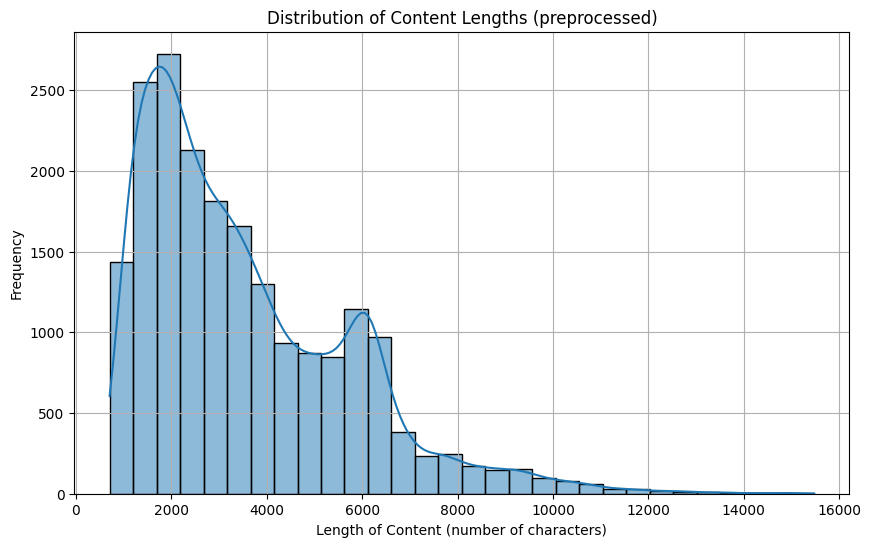

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Download NLTK resources if not already done
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Advanced text preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    # Remove stopwords, lemmatize, and remove short words
    text = " ".join(
        lemmatizer.lemmatize(word)
        for word in text.split()
        if word not in stop_words and len(word) > 2
    )
    return text

# Apply preprocessing to the content column to create 'content_preprocessed'
data_cleaned['content_preprocessed_simple'] = data_cleaned['content'].apply(preprocess_text)

# Calculate the length of each document in the preprocessed content
data_cleaned["content_length"] = data_cleaned["content_preprocessed_simple"].apply(len)

# Initialize color palette
sns.set_palette("tab20")

# Plot the distribution of document lengths
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned["content_length"], bins=30, kde=True)
plt.title("Distribution of Content Lengths (preprocessed)")
plt.xlabel("Length of Content (number of characters)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
data_cleaned['date'] = pd.to_datetime(data['date'], errors='coerce')

<ipython-input-15-5692635ac057>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['date'] = pd.to_datetime(data['date'], errors='coerce')


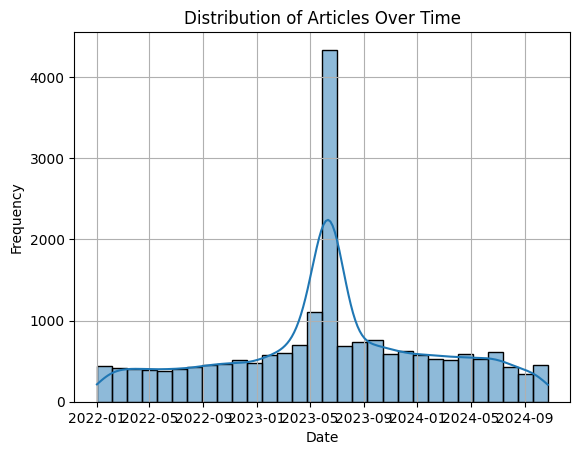

In [ ]:
#data_cleaned['date'].hist(bins=30, figsize=(10, 6))
sns.histplot(data_cleaned["date"], bins=30, kde=True)
plt.title("Distribution of Articles Over Time")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

By investigating the articles in June 2023 it turns out that there is a sudden increase in the number of articles collected from the website www.energy-xprt.com. The website has different subpages including "products", "training", "news", "articles" and more which can be found in the respective URL. We first select a subset of the data containing only articles from energy-xprt. It is noticeable that the increase occurs around June 2023.

<ipython-input-145-ef63d843e9c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])


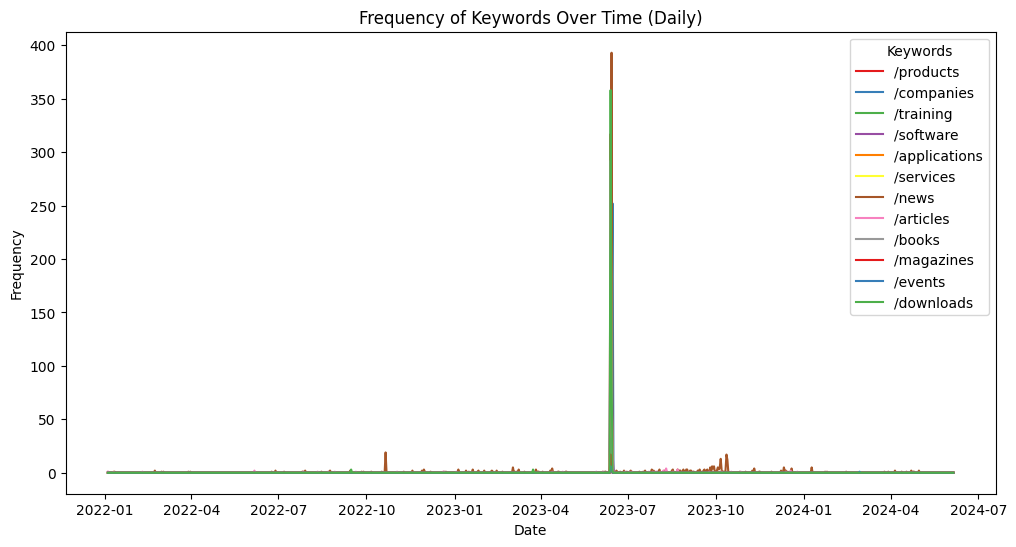

In [ ]:
# Ensure the date column is in datetime format (assuming the column is named 'date')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# Define keywords to search for in the URLs
keywords = ["/products", "/companies", "/training", "/software", "/applications", "/services", "/news", "/articles", "/books", "/magazines", "/events",  "/downloads"]

# Step 1: Filter for URLs from 'www.energy-xprt.com'
energyxprt_data = data_cleaned[data_cleaned['url'].str.contains("www.energy-xprt.com", na=False)]

# Define the full date range from the earliest to the latest date in energyxprt_data
full_date_range = pd.date_range(start=energyxprt_data['date'].min(), end=energyxprt_data['date'].max(), freq='D')

# Initialize an empty DataFrame with the full date range as its index
keyword_counts_over_time = pd.DataFrame(index=full_date_range)

# Step 2: Loop through each keyword and create subsets
for keyword in keywords:
    # Filter the subset for each keyword
    keyword_data = energyxprt_data[energyxprt_data['url'].str.contains(keyword, na=False)]

    # Group by date to count occurrences daily and reindex to the full date range
    keyword_counts = keyword_data.resample('D', on='date').size().reindex(full_date_range, fill_value=0)

    # Add the resulting counts as a column in keyword_counts_over_time
    keyword_counts_over_time[keyword] = keyword_counts


# Plot all keywords in a single plot
colors = sns.color_palette("Set1", len(keywords))
plt.figure(figsize=(12, 6))

for i, keyword in enumerate(keywords):
    plt.plot(keyword_counts_over_time.index, keyword_counts_over_time[keyword], label=keyword, color=colors[i])

# Set plot title and labels
plt.title("Frequency of Keywords Over Time (Daily)")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.legend(title="Keywords")
plt.show()

The table below shows the dates when different keywords (corresponding to subpages) were first and last included in the dataset. It seems that articles from certain subpages, such as “training,” “applications,” “books,” and “magazines,” were only available between June 13th and 14th, 2023, which explains the sudden increase in articles frequencies around this time.

In [ ]:
import pandas as pd

# Initialize a list to store results
keyword_dates = []

# Loop through each keyword
for keyword in keywords:
    # Get the keyword's frequency data
    keyword_data = keyword_counts_over_time[keyword]

    # Find the start date (first non-zero entry)
    start_date = keyword_data[keyword_data > 0].index.min()

    # Find the end date (last non-zero entry before it becomes zero)
    end_date = keyword_data[keyword_data > 0].index.max()

    # Count the total number of non-zero entries for the keyword
    total_entries = keyword_data[keyword_data > 0].sum()

    # Append the results to the list
    keyword_dates.append({
        'Keyword': keyword,
        'Start Date': start_date,
        'End Date': end_date,
        'Total Entries': total_entries
    })

# Convert the list to a DataFrame
keyword_dates_df = pd.DataFrame(keyword_dates)

# Display the table
print("Table of Keywords with Start Date, End Date, and Total Entries:")
print(keyword_dates_df)

Table of Keywords with Start Date, End Date, and Total Entries:
          Keyword Start Date   End Date  Total Entries
0       /products 2023-06-13 2023-06-15            485
1      /companies 2023-06-13 2023-09-25            600
2       /training 2023-06-13 2023-06-14            237
3       /software 2023-06-13 2023-06-15            204
4   /applications 2023-06-13 2023-06-14             82
5       /services 2022-01-10 2023-06-15            146
6           /news 2022-01-11 2024-04-30            815
7       /articles 2022-01-04 2023-12-25            438
8          /books 2023-06-13 2023-06-14             49
9      /magazines 2023-06-13 2023-06-14             24
10        /events 2023-06-13 2024-02-28             12
11     /downloads 2022-09-15 2023-06-15            461


Monthly article counts are relatively stable before and after June 2023. Multiple domains consistently contribute articles, indicating a well-rounded dataset.
The sudden spike due to articles of the website www.energy-xprt.com is visible in this plot as well.

<ipython-input-16-1a3a7ba9aa7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['month_year'] = data_cleaned['date'].dt.to_period('M')


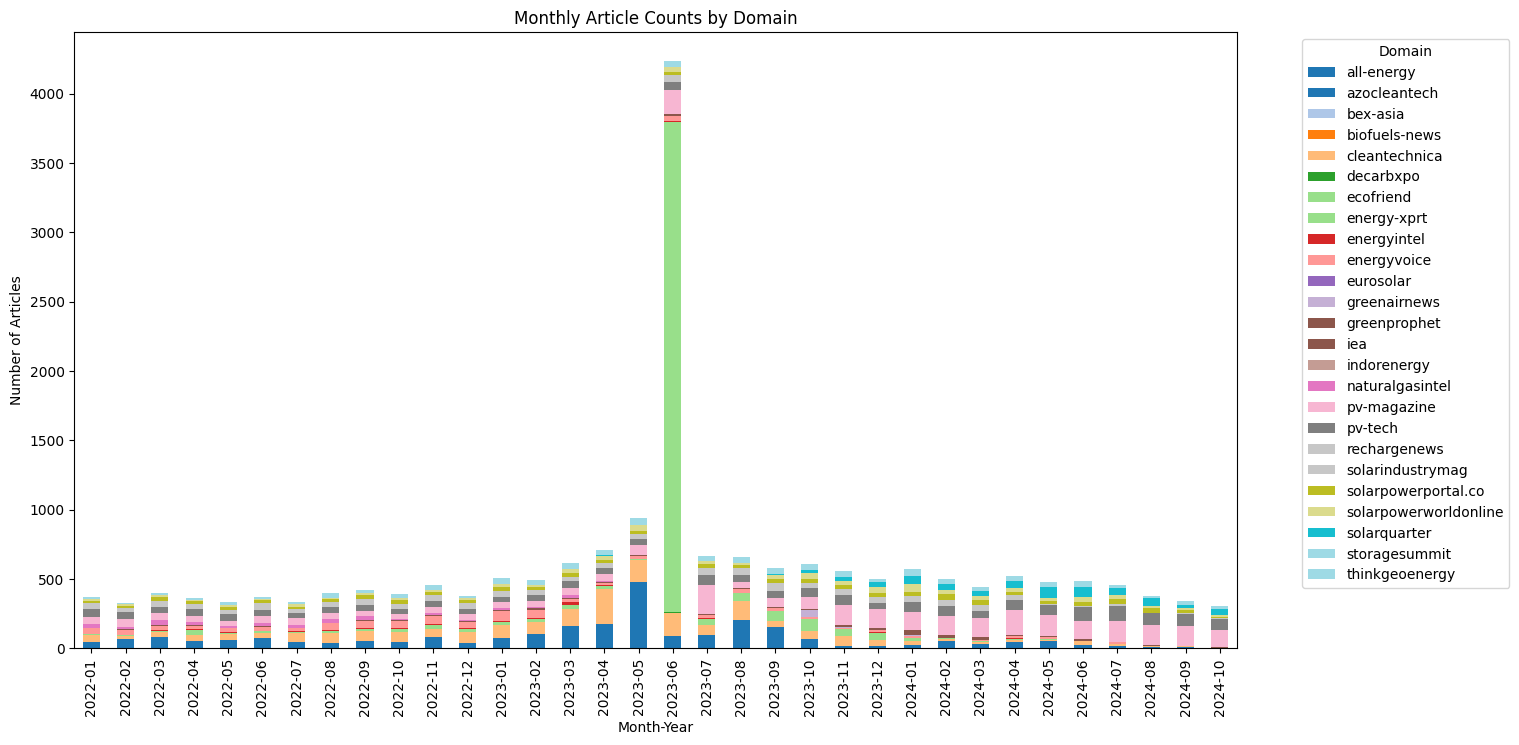

In [ ]:
# Extract month and year
data_cleaned['month_year'] = data_cleaned['date'].dt.to_period('M')

# Group by domain and month-year, then count articles
monthly_counts = data_cleaned.groupby(['month_year', 'domain']).size().unstack(fill_value=0)

# Plot the stacked bar chart
monthly_counts.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
plt.title("Monthly Article Counts by Domain")
plt.xlabel("Month-Year")
plt.ylabel("Number of Articles")
plt.legend(title="Domain", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()


**Pv-magazine**, **azocleantech**, **cleantechnica**, and **pv-tech** follow **energy-xprt** as top contributors, with each contributing over 1,000 articles. Since energy-xprt and a few other domains contribute the majority of articles, analyses based on this dataset could be disproportionately influenced by content from these domains.

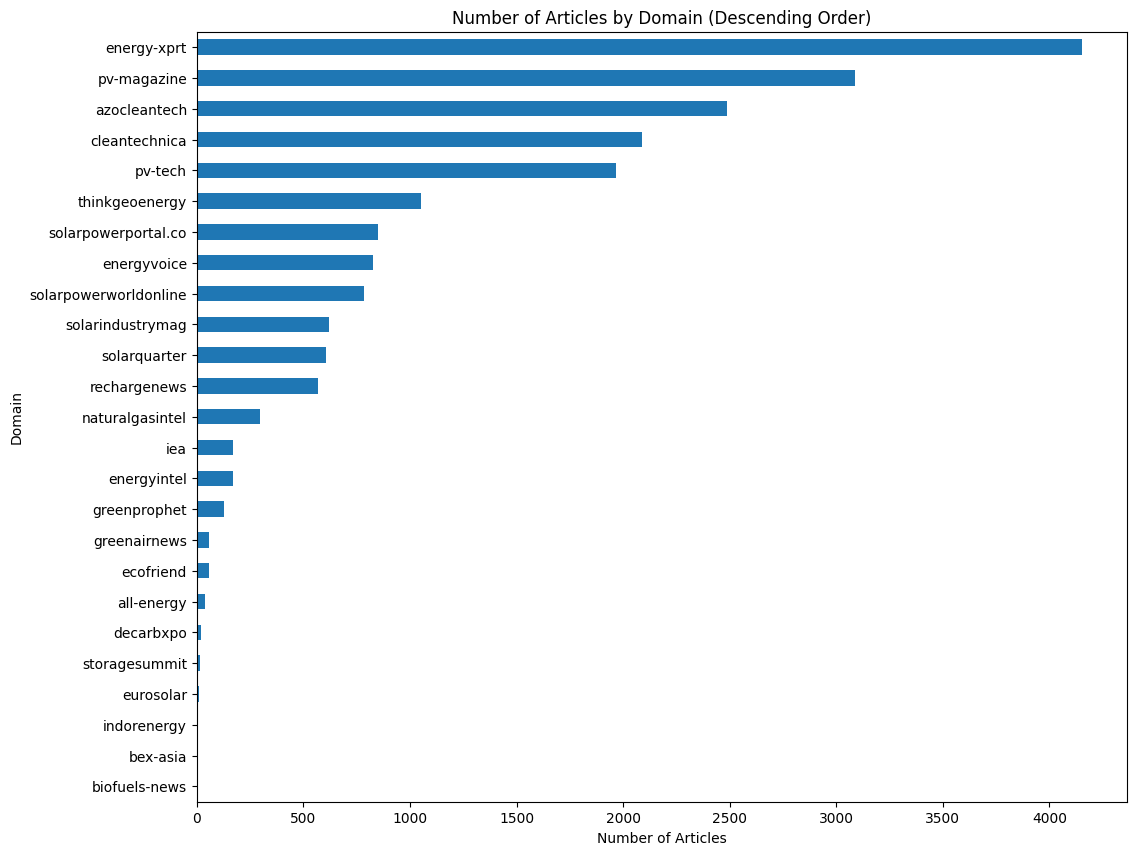

In [ ]:
domain_counts = data_cleaned['domain'].value_counts().sort_values(ascending=True)  # Ascending order for horizontal plot

# Plot the bar chart with horizontal orientation
plt.figure(figsize=(12, 10))
domain_counts.plot(kind='barh')
plt.title("Number of Articles by Domain (Descending Order)")
plt.xlabel("Number of Articles")
plt.ylabel("Domain")
plt.show()

In the following we will have a look at the length of article title and content and most common words in them.

**Peak Around 50 Characters for titles**: Most article titles are between 30 and 80 characters, with a peak frequency around 50 characters.

**Right-Skewed Distribution**: Both title and content length distributions are right-skewed, though content length shows more variation. This is expected, as titles tend to follow a standard length, while content length can vary. The longer articles could represent in-depth analyses, reports, or comprehensive studies on clean technology.

In [ ]:
data_cleaned['title_length'] = data_cleaned['title'].apply(len)
data_cleaned['content_length'] = data_cleaned['content'].apply(len)

<ipython-input-17-a3994e4f8235>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['title_length'] = data_cleaned['title'].apply(len)
<ipython-input-17-a3994e4f8235>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['content_length'] = data_cleaned['content'].apply(len)


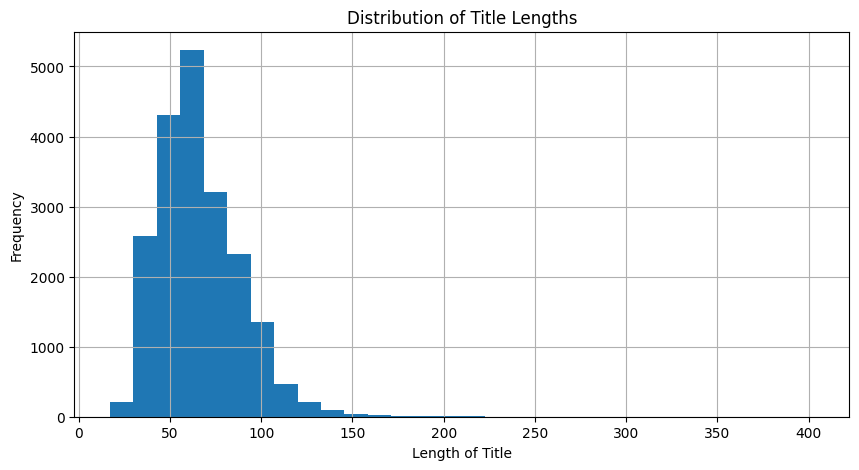

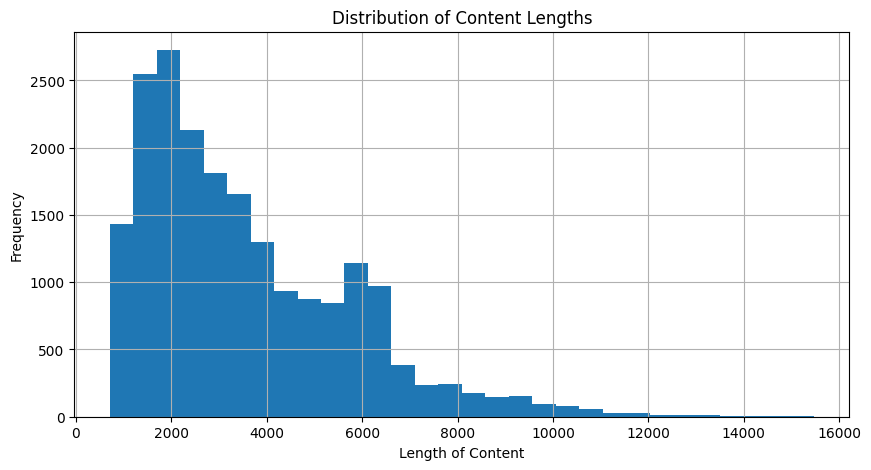

In [ ]:
plt.figure(figsize=(10, 5))
data_cleaned['title_length'].hist(bins=30)
plt.title("Distribution of Title Lengths")
plt.xlabel("Length of Title")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
data_cleaned['content_length'].hist(bins=30)
plt.title("Distribution of Content Lengths")
plt.xlabel("Length of Content")
plt.ylabel("Frequency")
plt.show()

In the following plot, the most common words in title and content are compared, with frequencies proportionally scaled to the shared, most-frequent word, “energy” (serving as the baseline). The analysis reveals different patterns:

*   Titles emphasize broad, attention-grabbing terms like "solar", “PV” and "international". These words are likely used to create engaging and eye-catching headlines.

*   Content includes terms like “power,” “project”, “system,” and “company,” suggesting that the articles delve into practical aspects of the industry, e.g. technology applications, project management, and operational details.

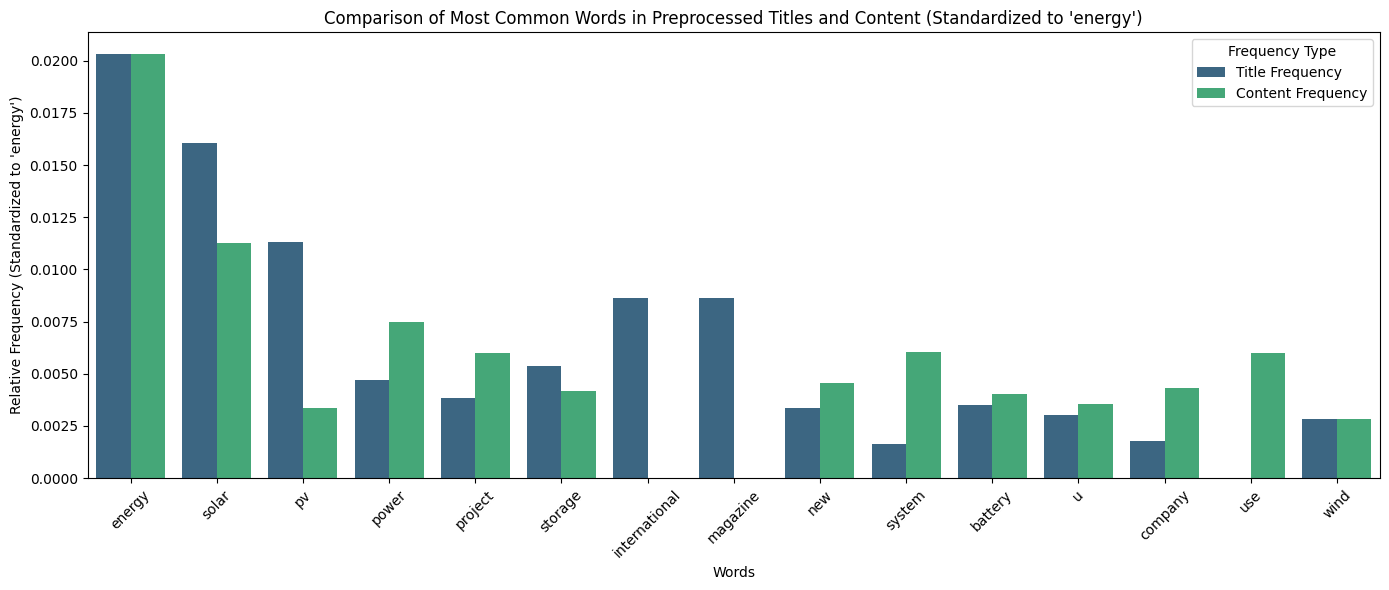

In [ ]:
from collections import Counter


# Define the function to get most common words
def get_most_common_words(text_series, num_words=30):
    # Concatenate all text data and remove special characters
    words = text_series.str.cat(sep=' ')
    words = re.findall(r'\w+', words.lower())  # Tokenize and lowercase
    # Filter out stopwords
    filtered_words = [word for word in words if word not in stop_words]
    # Count the most common words and convert to dictionary
    common_words = dict(Counter(filtered_words).most_common(num_words))
    return common_words, len(filtered_words)  # Return total word count for normalization

# Get the most common words and total word count in titles and content
title_common_words, title_total_count = get_most_common_words(data_cleaned['title_preprocessed'])
content_common_words, content_total_count = get_most_common_words(data_cleaned['content_preprocessed'])

# Create a set of unique words from both title and content dictionaries
all_words = set(title_common_words).union(set(content_common_words))

# Calculate the relative frequency of "energy" in titles and content
energy_title_freq = title_common_words.get("energy", 0) / title_total_count
energy_content_freq = content_common_words.get("energy", 0) / content_total_count

# Use the smaller of the two frequencies as the standard frequency
standard_energy_freq = min(energy_title_freq, energy_content_freq)

# Calculate scaling factors for titles and content
title_scaling_factor = standard_energy_freq / energy_title_freq if energy_title_freq != 0 else 1
content_scaling_factor = standard_energy_freq / energy_content_freq if energy_content_freq != 0 else 1

# Apply scaling to the relative frequencies
title_counts = [(title_common_words.get(word, 0) / title_total_count) * title_scaling_factor for word in all_words]
content_counts = [(content_common_words.get(word, 0) / content_total_count) * content_scaling_factor for word in all_words]

# Create a DataFrame for easier plotting
comparison_df = pd.DataFrame({
    'Word': list(all_words),
    'Title Frequency': title_counts,
    'Content Frequency': content_counts
})

# Sort by the highest total relative frequency
comparison_df['Total Frequency'] = comparison_df['Title Frequency'] + comparison_df['Content Frequency']
comparison_df = comparison_df.sort_values(by='Total Frequency', ascending=False).head(15)

# Reshape the DataFrame for Seaborn (melt into long format)
comparison_long_df = comparison_df.melt(id_vars='Word',
                                        value_vars=['Title Frequency', 'Content Frequency'],
                                        var_name='Type',
                                        value_name='Frequency')

# Plotting with Seaborn
plt.figure(figsize=(14, 6))
sns.barplot(x='Word', y='Frequency', hue='Type', data=comparison_long_df, palette="viridis")

# Add labels and formatting
plt.xlabel("Words")
plt.ylabel("Relative Frequency (Standardized to 'energy')")
plt.title("Comparison of Most Common Words in Preprocessed Titles and Content (Standardized to 'energy')")
plt.xticks(rotation=45)
plt.legend(title="Frequency Type")

plt.tight_layout()
plt.show()

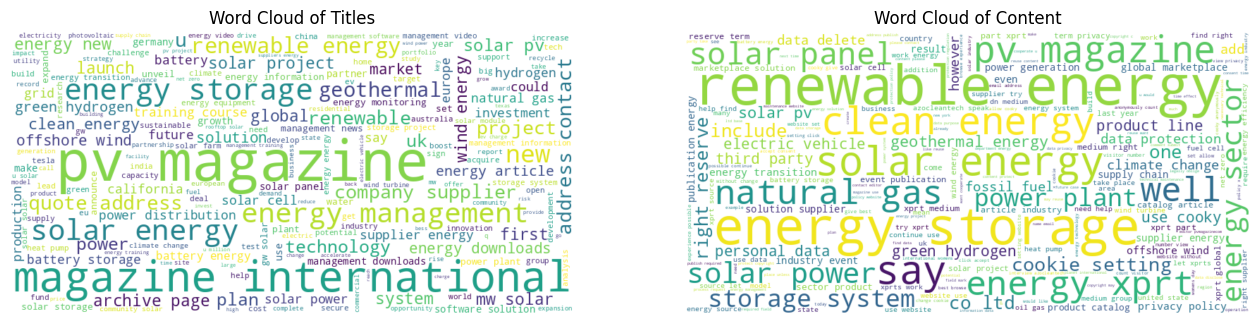

In [ ]:
from wordcloud import WordCloud

# Combine all titles into a single string
title_text = ' '.join(data_cleaned['title_preprocessed'].dropna().tolist())

# Combine all content into a single string
content_text = ' '.join(data_cleaned['content_preprocessed'].dropna().tolist())

# Generate word clouds
title_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(title_text)
content_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(content_text)

# Display the word clouds side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Title word cloud
axs[0].imshow(title_wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title("Word Cloud of Titles")

# Content word cloud
axs[1].imshow(content_wordcloud, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title("Word Cloud of Content")

plt.show()

Both titles and content contain bigrams such as “solar energy,” “energy storage,” “renewable energy,” and “clean energy,” indicating that the dataset heavily focuses on renewable energy topics. In content, terms like “data protection,” “climate change,” and “fossil fuel” reflect a broader context on environmental and data privacy concerns, indicating that the articles might discuss regulatory or sustainability aspects in-depth.


<ipython-input-28-ba2b5de29dd9>:51: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-77-d5bc677b4acb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['title_preprocessed'] = data_cleaned['title'].apply(refined_preprocess_text)
<ipython-input-77-d5bc677b4acb>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="frequency", y="bigram", data=title_bigram_freq_df, palette="viridis", ax=axs[0])
<ipython-input-77-d

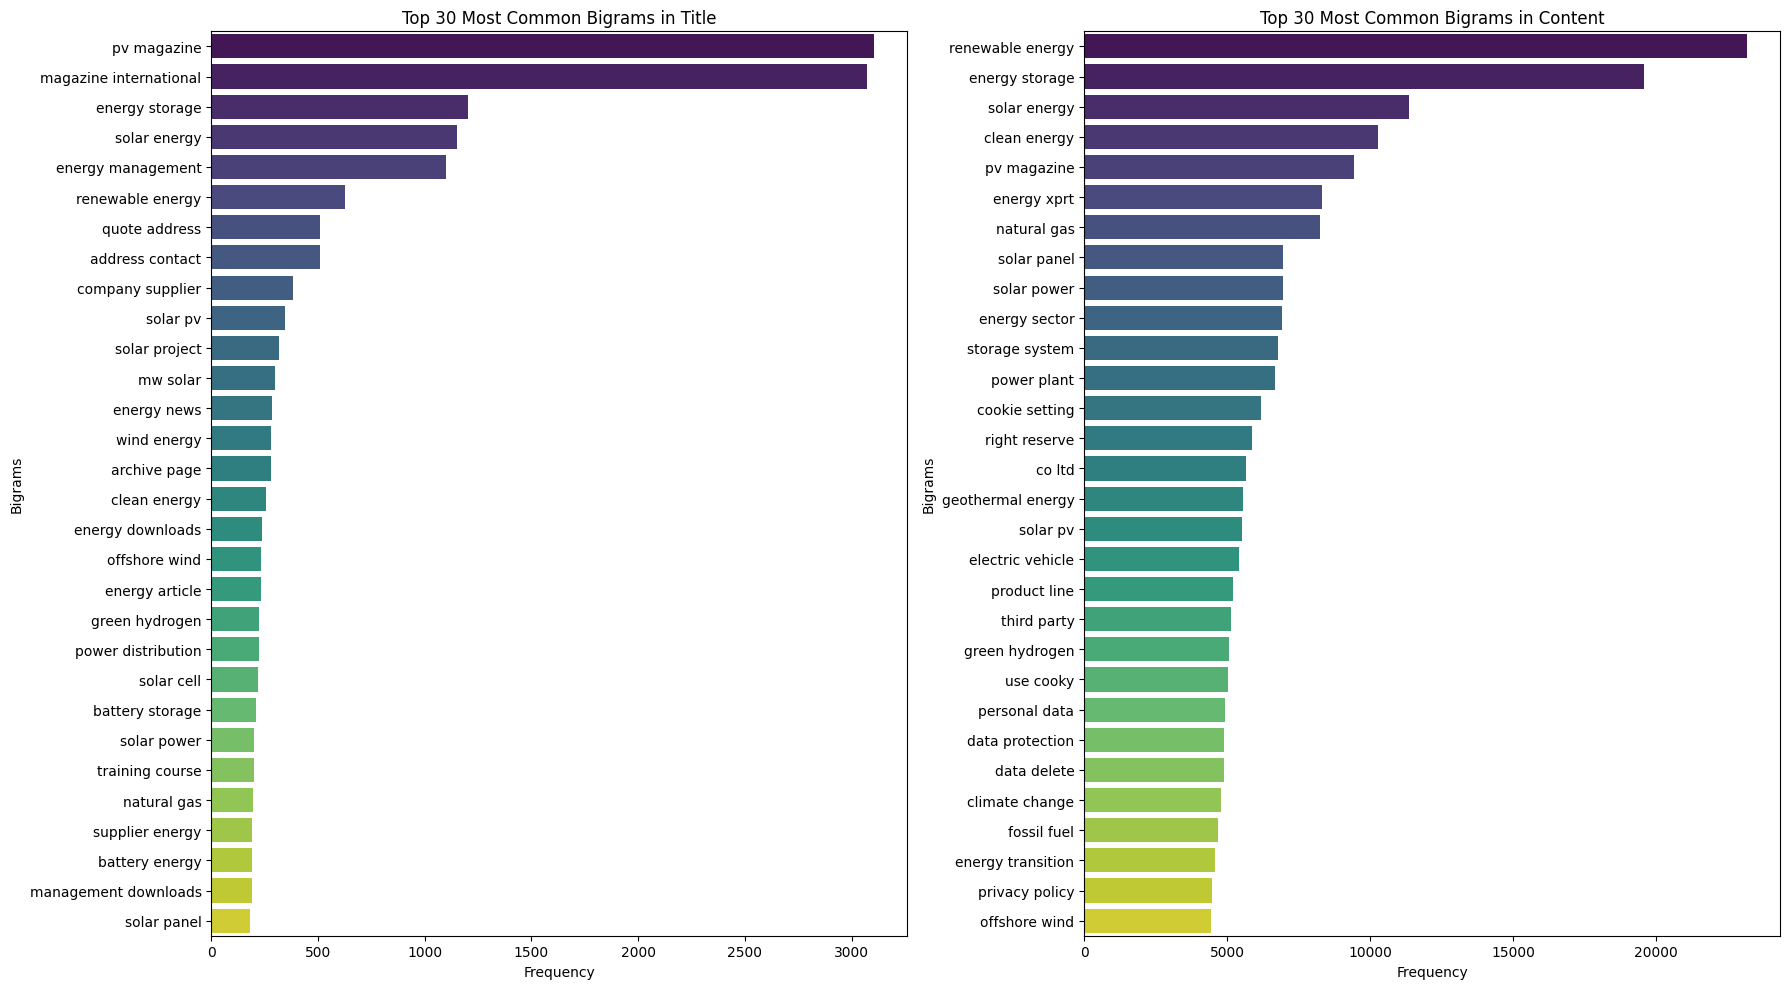

In [ ]:
from nltk import ngrams
# Function to count bigrams
def count_bigrams(text_series):
    bigram_counts = Counter()
    for text in text_series:
        bigrams = ngrams(text.split(), 2)
        bigram_counts.update(bigrams)
    return bigram_counts

# Count bigrams in titles
title_bigram_freq = count_bigrams(data_cleaned["title_preprocessed"])
title_bigram_freq_df = pd.DataFrame(
    title_bigram_freq.most_common(30), columns=["bigram", "frequency"]
)
title_bigram_freq_df["bigram"] = title_bigram_freq_df["bigram"].apply(lambda x: " ".join(x))

# Count bigrams in content
content_bigram_freq = count_bigrams(data_cleaned["content_preprocessed"])
content_bigram_freq_df = pd.DataFrame(
    content_bigram_freq.most_common(30), columns=["bigram", "frequency"]
)
content_bigram_freq_df["bigram"] = content_bigram_freq_df["bigram"].apply(lambda x: " ".join(x))

# Plotting side-by-side
fig, axs = plt.subplots(1, 2, figsize=(18, 10))

# Title bigrams plot
sns.barplot(x="frequency", y="bigram", data=title_bigram_freq_df, palette="viridis", ax=axs[0])
axs[0].set_title("Top 30 Most Common Bigrams in Title")
axs[0].set_xlabel("Frequency")
axs[0].set_ylabel("Bigrams")

# Content bigrams plot
sns.barplot(x="frequency", y="bigram", data=content_bigram_freq_df, palette="viridis", ax=axs[1])
axs[1].set_title("Top 30 Most Common Bigrams in Content")
axs[1].set_xlabel("Frequency")
axs[1].set_ylabel("Bigrams")

plt.tight_layout()
plt.show()

<ipython-input-83-fe14164458a8>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="frequency", y="skip_gram", data=skip_gram_freq_df, palette="viridis")


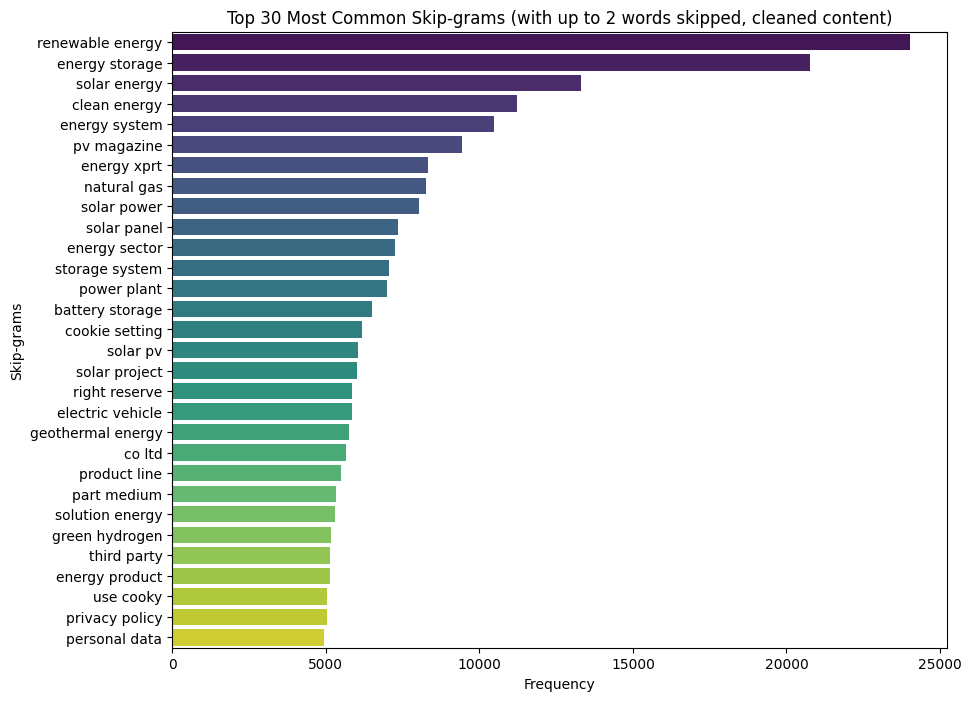

In [ ]:
# Function to generate skip-grams
def generate_skip_grams(text_series, n=2, k=2):
    skip_gram_counts = Counter()
    for text in text_series:
        words = word_tokenize(text)
        for i in range(len(words)):
            for j in range(1, k + 1):
                if i + j < len(words):
                    skip_gram = (words[i], words[i + j])
                    skip_gram_counts[skip_gram] += 1
    return skip_gram_counts

# Generate skip-grams from the preprocessed content
skip_gram_freq = generate_skip_grams(data_cleaned["content_preprocessed"], n=2, k=2)

# Convert skip-grams to DataFrame for visualization
skip_gram_freq_df = pd.DataFrame(skip_gram_freq.most_common(30), columns=["skip_gram", "frequency"])
skip_gram_freq_df["skip_gram"] = skip_gram_freq_df["skip_gram"].apply(lambda x: " ".join(x))

# Plot the top 30 skip-grams
plt.figure(figsize=(10, 8))
sns.barplot(x="frequency", y="skip_gram", data=skip_gram_freq_df, palette="viridis")
plt.title("Top 30 Most Common Skip-grams (with up to 2 words skipped, cleaned content)")
plt.xlabel("Frequency")
plt.ylabel("Skip-grams")
plt.show()



## Key Points of the Skip-gram Visualization
###Common Phrases and Themes:
The most frequent skip-grams include pairs like "renewable energy", "energy storage", "solar energy", and "clean energy". This suggests that topics related to renewable energy and sustainable technologies are dominant themes in the dataset.
Other skip-grams like "natural gas", "solar panel", "battery storage", and "power plant" reflect a broader focus on different energy sources and storage technologies.
### Insight into Specific Sectors and Topics:
Terms like "electric vehicle", "geothermal energy", and "green hydrogen" show the presence of specific energy technologies and sectors within the content.
The inclusion of terms like "energy system" and "energy sector" suggests discussions about the structure or scope of the energy industry.
### Technical and Compliance Terms:
Pairs such as "data protection", "privacy policy", "data deleted", and "third party" hint at discussions around data privacy and compliance, which might be relevant in the context of energy data and technology.
### Mixed Terms:
Some skip-grams like "cookie setting", "third party", and "privacy policy" may come from common terms used in website privacy policies, legal notices, or data disclaimers. These might not be directly related to the core energy content but are included because they appear frequently in metadata or surrounding text.
### Interpretation and Insights
The high frequency of skip-grams like "renewable energy" and "solar energy" suggests a strong emphasis on sustainable energy sources within the dataset.
The presence of terms related to battery storage, solar panels, geothermal energy, and green hydrogen indicates a diverse representation of energy technologies.
The occurrence of terms related to data protection and privacy policy may indicate the presence of content that addresses privacy concerns, likely relevant in the context of technology and regulatory requirements in the energy sector.
### What Skip-grams Reveal About Text Patterns
Flexible Word Pairing: Unlike strict bigrams, skip-grams allow for up to 2 words in between, capturing co-occurrences that may be slightly separated but still contextually related. For example, "energy storage" could also capture "energy efficient storage" as a skip-gram.
Deeper Contextual Understanding: By allowing skips, we capture a broader range of expressions, which can provide a richer understanding of how terms are used in varied contexts.

## Sentiment Analysis

### Compare Title Sentiment with Content Sentiment

Sentiment analysis using the TextBlob package is applied on raw data to better capture the sentiment in the original data. Preprocessing (removing stopwords or punctuation, lemmatizing, etc.) removes words or structure that contribute to the sentiment, potentially reducing the accuracy of the analysis.

The distribution of the sentiment found in article's title and content are both plotted in one graph for comparison.
The title and content sentiment scores have a high concentration around/at a polarity of 0, respectively, indicating a predominantly neutral tone.
This clustering around zero is expected for scientific reports or news articles, as they often aim for a neutral tone. The title sentiment distribution (shown in dark purple) has a much higher peak at zero compared to the content sentiment distribution, indicating that titles are often kept neutral. The content sentiment distribution (shown in green) has a slight skew toward positive polarity values. This slight positive sentiment in content may be due to optimistic language when discussing advancements, benefits, or potential in the energy and technology sectors.
  
The objectivity is analyzed in the next step.

<ipython-input-18-f9b18aca1287>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sentiment_title'] = data_cleaned['title'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else 0)
<ipython-input-18-f9b18aca1287>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sentiment_content'] = data_cleaned['content'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else 0)


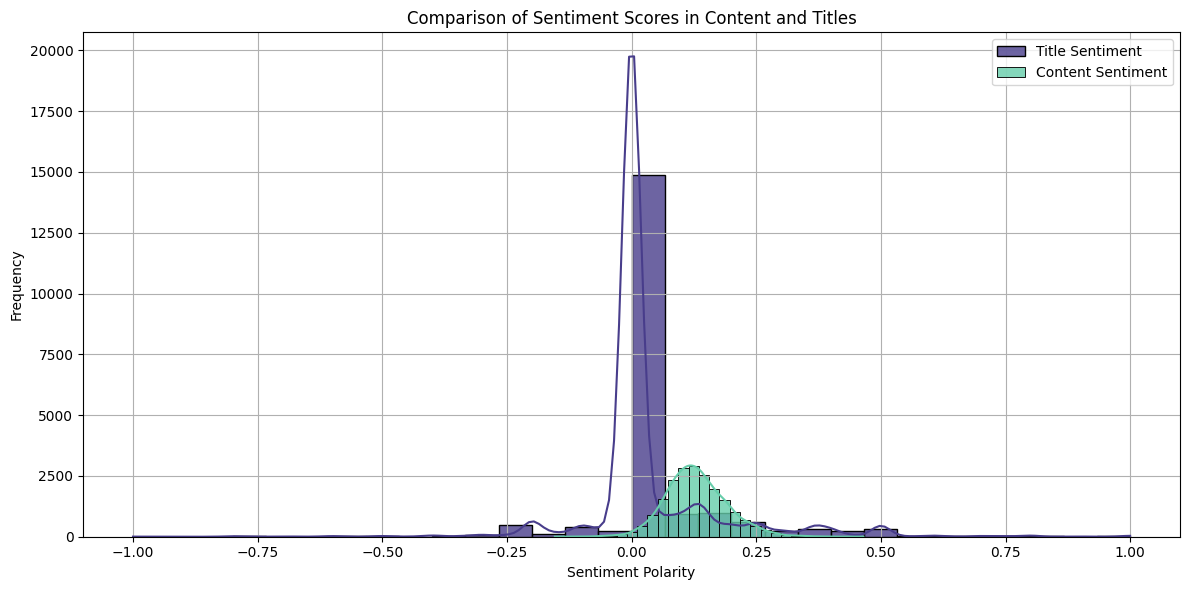

In [ ]:
from textblob import TextBlob

# Calculate sentiment polarity
data_cleaned['sentiment_title'] = data_cleaned['title'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else 0)
data_cleaned['sentiment_content'] = data_cleaned['content'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else 0)

# Plot both histograms in one figure
plt.figure(figsize=(12, 6))

# Plot sentiment distribution
sns.histplot(data_cleaned['sentiment_title'], bins=30, kde=True, color='darkslateblue', label="Title Sentiment", alpha=0.8)
sns.histplot(data_cleaned['sentiment_content'], bins=30, kde=True, color='mediumaquamarine', label="Content Sentiment", alpha=0.8)

# Set plot title and labels
plt.title("Comparison of Sentiment Scores in Content and Titles")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")

# Add legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Compare Title Subjectivity with Content Subjectivity

The distribution of subjectivity scores in titles (shown in dark purple) is highly concentrated near zero. Titles are far more objective than content on average, with most scores close to zero. The content subjectivity distribution (shown in green) has a broader spread with a peak around 0.4 – 0.5, indicating a more subjective tone compared to titles.
The title subjectivity distribution shows a peak around zero (indicating some highly objective content), but there is also a second peak around 0.4, indicating that a significant portion of content leans toward moderate subjectivity. Very few titles or content pieces have subjectivity scores close to 1.0, which would indicate highly subjective language.

<ipython-input-19-65179337102a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['subjectivity_title'] = data_cleaned['title'].apply(get_subjectivity)
<ipython-input-19-65179337102a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['subjectivity_content'] = data_cleaned['content'].apply(get_subjectivity)


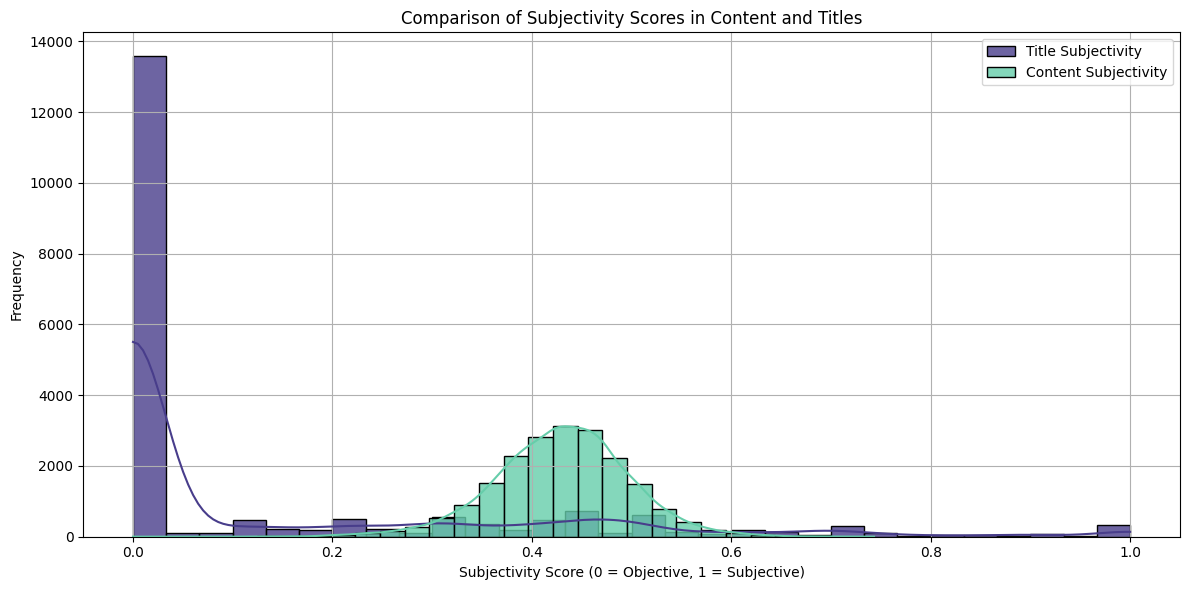

In [ ]:
# Function to calculate subjectivity of each content
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Apply the subjectivity calculation to each title and content entry
data_cleaned['subjectivity_title'] = data_cleaned['title'].apply(get_subjectivity)
data_cleaned['subjectivity_content'] = data_cleaned['content'].apply(get_subjectivity)

# Plot both histograms in one figure
plt.figure(figsize=(12, 6))

# Plot  subjectivity distribution
sns.histplot(data_cleaned['subjectivity_title'], bins=30, kde=True, color='darkslateblue', label="Title Subjectivity", alpha=0.8)
sns.histplot(data_cleaned['subjectivity_content'], bins=30, kde=True, color='mediumaquamarine', label="Content Subjectivity", alpha=0.8)

# Set plot title and labels
plt.title("Comparison of Subjectivity Scores in Content and Titles")
plt.xlabel("Subjectivity Score (0 = Objective, 1 = Subjective)")
plt.ylabel("Frequency")

# Add legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Time of publication
Tuesday and Wednesday have the highest article frequencies, at 4500-5000 articles. Thursday and Friday have moderate article frequencies, with 3,980 articles on Thursday and 2,966 on Friday. Saturday and Sunday have the lowest article counts, possibly due to a reduced workforce on the weekend. The dataset does not contain hourly data, limiting the ability to analyze hourly trends.

<ipython-input-20-8b7d008fcdeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['day_of_week'] = data_cleaned['date'].dt.day_name()  # Day of the week
<ipython-input-20-8b7d008fcdeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['hour'] = data_cleaned['date'].dt.hour  # Hour of the day


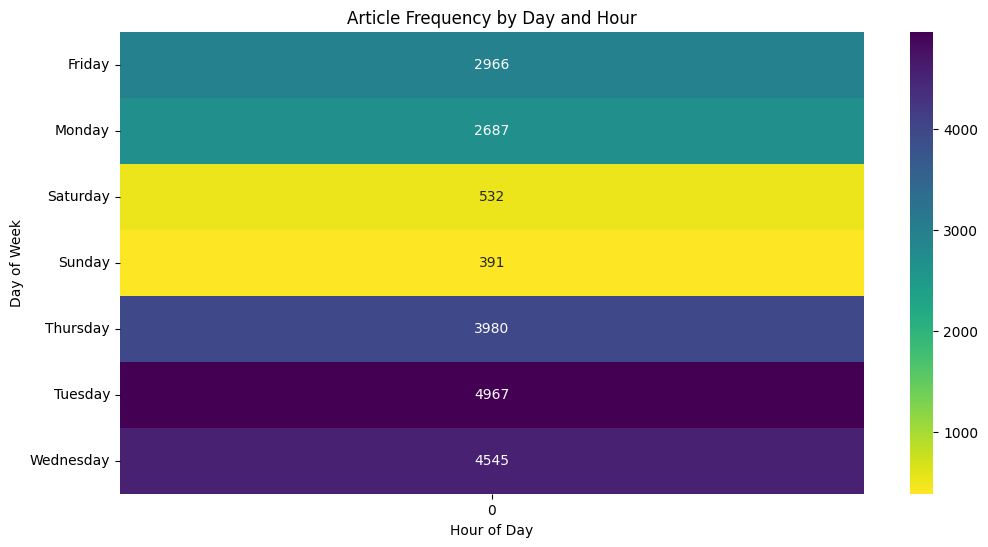

In [ ]:
data_cleaned['day_of_week'] = data_cleaned['date'].dt.day_name()  # Day of the week
data_cleaned['hour'] = data_cleaned['date'].dt.hour  # Hour of the day

# Pivot table to count articles by day and hour
day_hour_pivot = data_cleaned.pivot_table(index='day_of_week', columns='hour', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(day_hour_pivot, cmap="viridis_r", annot=True, fmt="d")
plt.title("Article Frequency by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


The heatmap of article publication by month and year shows a spike in June 2023, which as described before is due to sudden increase in articles by energy-xprt. Besides from the June 2023 peak, article publication frequency remain relatively stable across months, typically varying between 300 and 700 articles per month. The number of articles published per month is generally consistent from 2022 to 2024, without any major seasonal trends. The number of articles published in 2023 seem to be slightly higher than the other years. This could be driven by a growing interest in the topics covered by the dataset or an expansion of the sources included, as in the case of June 2023.

<ipython-input-21-7eeb958c1dff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['year'] = data_cleaned['date'].dt.year
<ipython-input-21-7eeb958c1dff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['month'] = data_cleaned['date'].dt.month


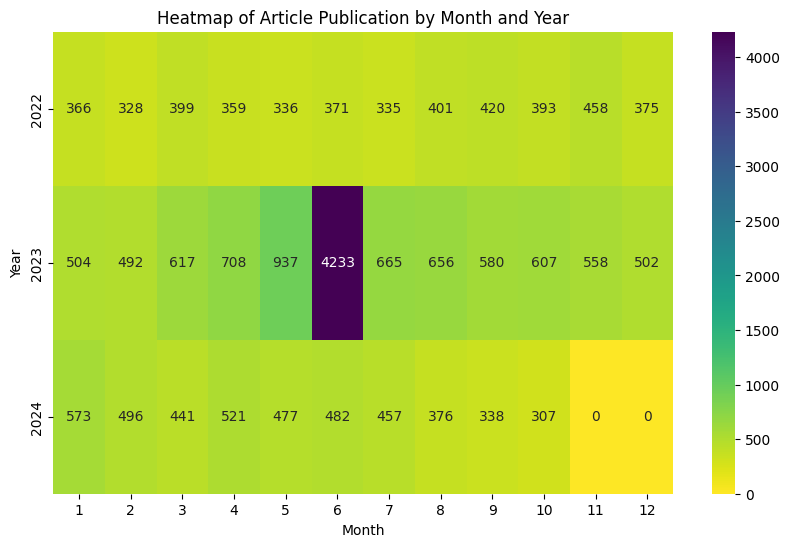

In [ ]:
# Extract year and month
data_cleaned['year'] = data_cleaned['date'].dt.year
data_cleaned['month'] = data_cleaned['date'].dt.month

# Create a pivot table for the heatmap
publication_pivot = data_cleaned.pivot_table(index='year', columns='month', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(publication_pivot, cmap="viridis_r", annot=True, fmt="d")
plt.title("Heatmap of Article Publication by Month and Year")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


Both plots indicate very little relationship between length (title or content) and sentiment polarity. The smoothed trend lines are almost flat, suggesting that neither title nor content length has a significant impact on sentiment polarity. The slight increase in positive sentiment as title length grows might indicate that longer titles sometimes incorporate more descriptive or positive language, though this effect is minimal. The heatmap confirms that there is minimal correlation between the length of titles or content and the sentiment or subjectivity of the text.

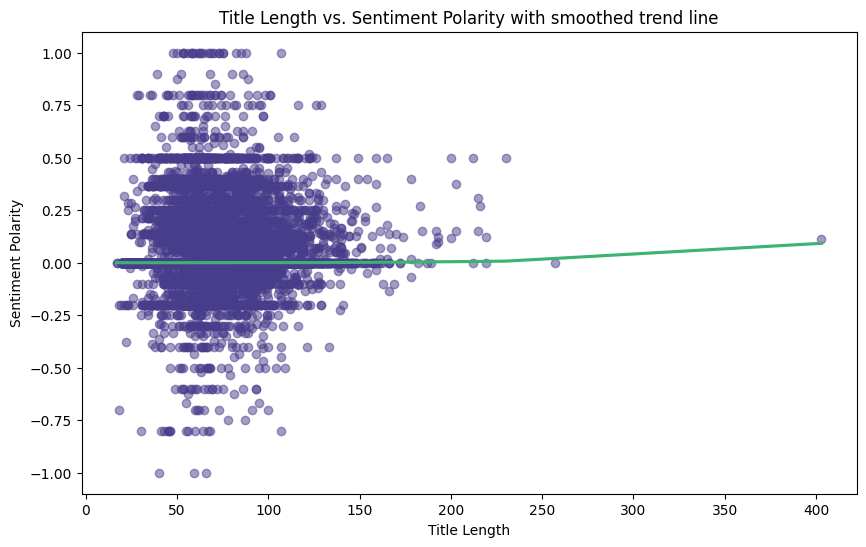

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['title_length'], data_cleaned['sentiment_title'], alpha=0.5, color='darkslateblue', label="Data Points")
sns.regplot(x=data_cleaned['title_length'], y=data_cleaned['sentiment_title'],
            scatter=False, lowess=True, color='mediumseagreen', label="Smoothed Line")
plt.title("Title Length vs. Sentiment Polarity with smoothed trend line")
plt.xlabel("Title Length")
plt.ylabel("Sentiment Polarity")
plt.show()

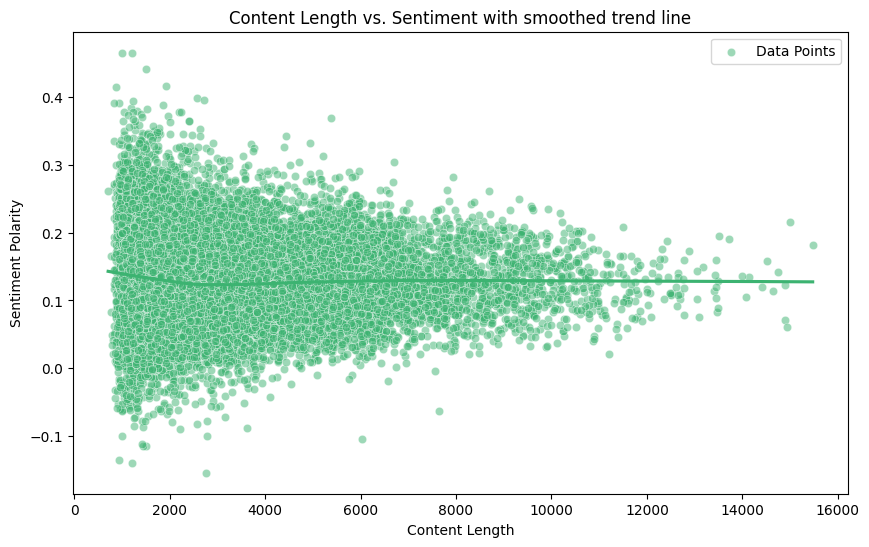

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['content_length'], y=data_cleaned['sentiment_content'], alpha=0.5, color='mediumseagreen', label="Data Points")
sns.regplot(x=data_cleaned['content_length'], y=data_cleaned['sentiment_content'],
            scatter=False, lowess=True, color='mediumseagreen', label="Smoothed Line")
plt.title("Content Length vs. Sentiment with smoothed trend line")
plt.xlabel("Content Length")
plt.ylabel("Sentiment Polarity")
plt.show()


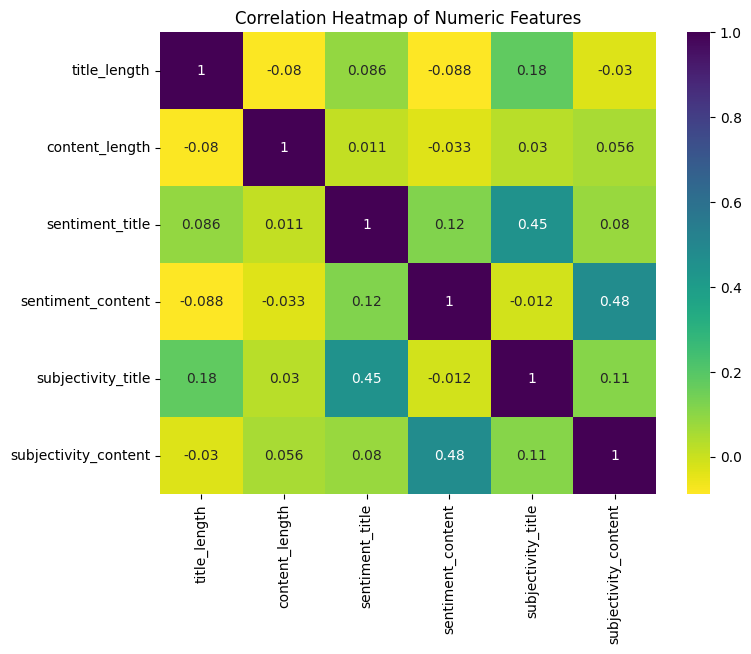

In [ ]:
# Select numerical columns
numeric_data = data_cleaned[['title_length', 'content_length', 'sentiment_title',  'sentiment_content', 'subjectivity_title', 'subjectivity_content']]

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="viridis_r")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


This plot shows the average article length of each of the 25 sources. The average length varies from 2000 to 7500 characters.

<ipython-input-223-904f01277a26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['content_length'] = data_cleaned['content'].apply(len)


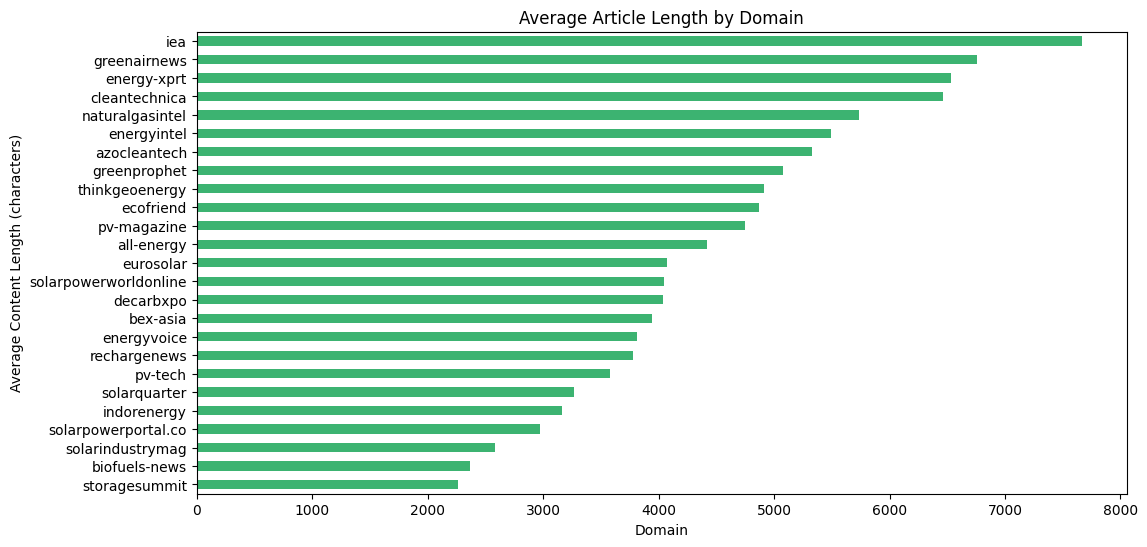

In [ ]:
# Group by domain and calculate average content length
avg_content_length = data_cleaned.groupby('domain')['content_length'].mean().sort_values(ascending=True)

# Plot the average article length by domain
plt.figure(figsize=(12, 6))
avg_content_length.plot(kind='barh', color="mediumseagreen")
plt.title("Average Article Length by Domain")
plt.xlabel("Domain")
plt.ylabel("Average Content Length (characters)")
plt.show()


The sentiment distribution for each domain is ordered in descending order based on the mean sentiment score. The sources bex-asia and biofuels-news have relatively high mean sentiment scores, close to 0.2. However, since these sources have only 1 or 2 articles, no boxplot appears for these domains. Most domains have a median sentiment polarity above 0, indicating a general tendency toward positive sentiment in article content. These domains show a wider range in sentiment polarity, with outliers on both positive and negative sides. Domains such as Energy-Xprt, SolarPowerWorldOnline, and PV-Magazine have negative outliers, suggesting occasional articles with negative sentiment.

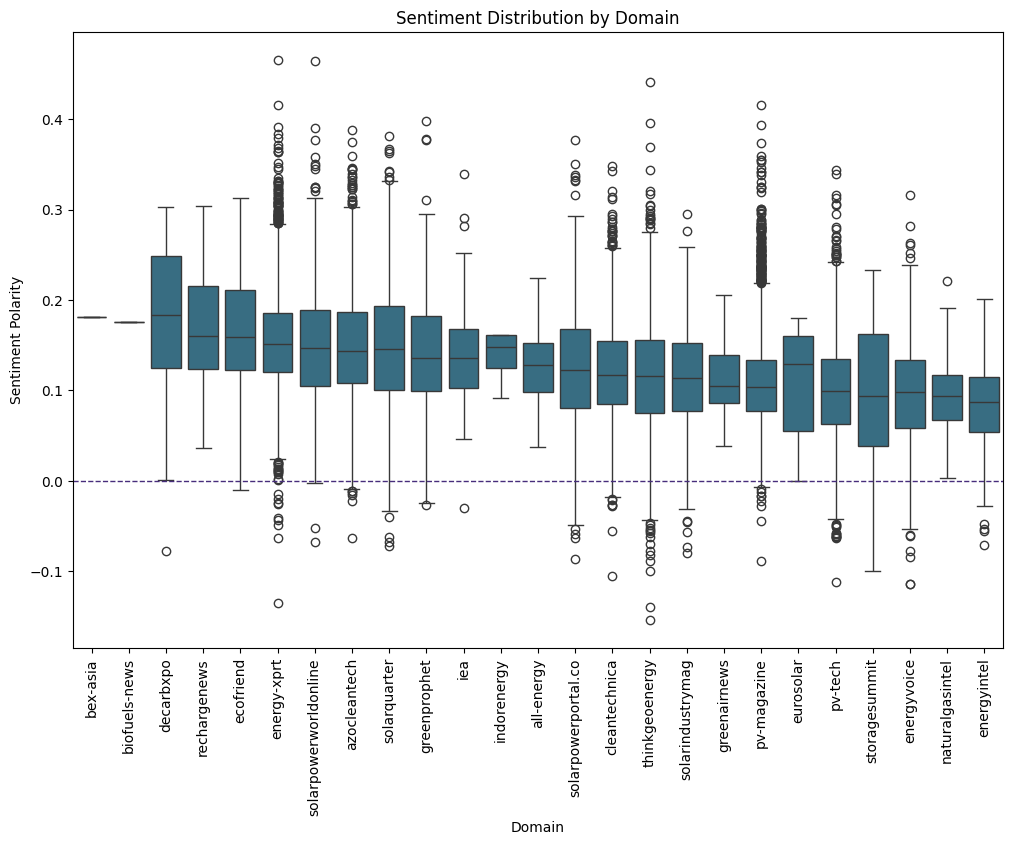

In [ ]:
domain_order = data_cleaned.groupby('domain')['sentiment_content'].mean().sort_values(ascending=False).index

# Plot sentiment distribution by domain
plt.figure(figsize=(12, 8))
sns.boxplot(x='domain', y='sentiment_content', data=data_cleaned, color='#2c728e', order=domain_order)
plt.axhline(0, color='#472d7b', linestyle='--', linewidth=1)
plt.title("Sentiment Distribution by Domain")
plt.xlabel("Domain")
plt.ylabel("Sentiment Polarity")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# number of articles by the domains bex-asia and biofuels-news
domain_counts = data_cleaned['domain'].value_counts().loc[['bex-asia', 'biofuels-news']]
print(domain_counts)

### Line Plot
Illustrates the average monthly sentiment score of all articles, along with a 6-month moving average for smoother trend analysis.

The sentiment score reachest its highest point in May and June 2023 at approximately 0.16. Following the peak, there is a steady decline in sentiment, with the average sentiment score dropping to around 0.11 by late 2024. The 6-month moving average (dashed line) smooths out short-term fluctuations, highlighting the upward trend until mid-2023 and the followed by decline.

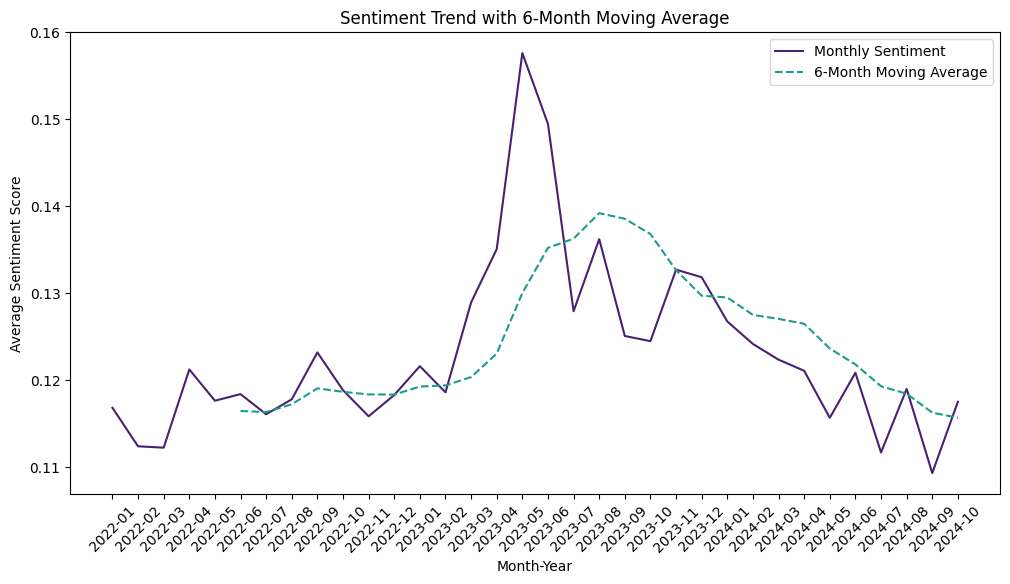

In [ ]:
# Group by month-year and calculate average sentiment
monthly_sentiment = data_cleaned.groupby('month_year')['sentiment_content'].mean()
sentiment_moving_avg = monthly_sentiment.rolling(window=6).mean()

# Plot the trend line with moving average
plt.figure(figsize=(12, 6))
plt.plot(monthly_sentiment.index.astype(str), monthly_sentiment, label="Monthly Sentiment", color="#482173")
plt.plot(sentiment_moving_avg.index.astype(str), sentiment_moving_avg, label="6-Month Moving Average", color="#1e9b8a", linestyle="--")
plt.title("Sentiment Trend with 6-Month Moving Average")
plt.xlabel("Month-Year")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### The treemap illustrates the article counts (represented by area size) and sentiment scores (represented by color intensity) for each domain.

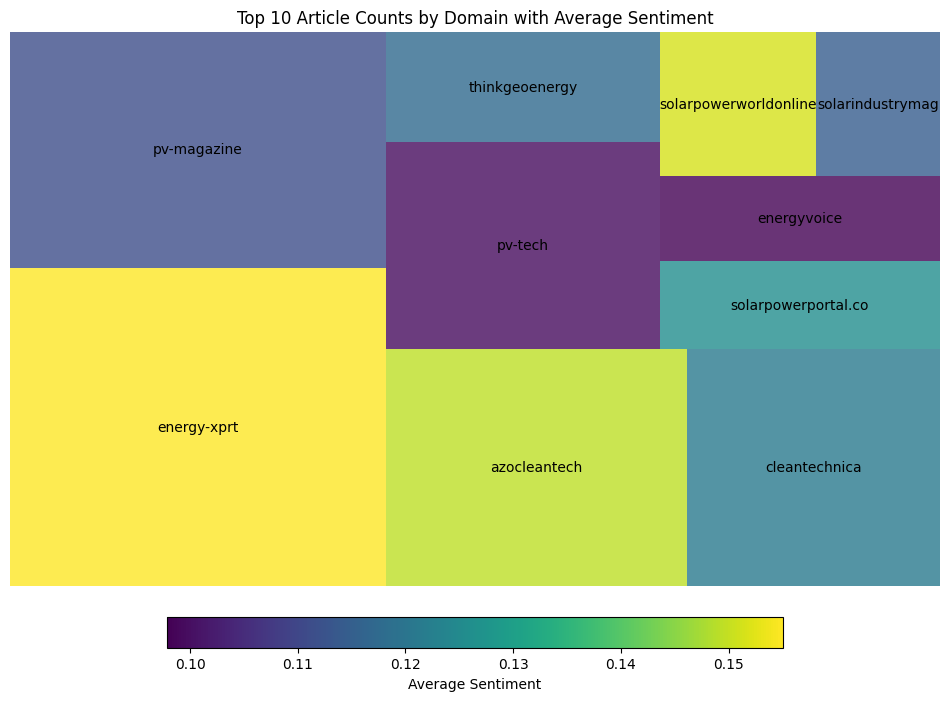

In [ ]:
# Install squarify if you haven't already
#!pip install squarify

# Import necessary libraries
import squarify
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob

# Calculate sentiment if not done already
#data['sentiment'] = data_cleaned['content'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else 0)

# Calculate article counts and average sentiment per domain
domain_stats = data_cleaned.groupby('domain').agg(article_count=('domain', 'size'), avg_sentiment=('sentiment_content', 'mean'))
domain_stats = domain_stats.sort_values(by='article_count', ascending=False)

# Filter for top 10 domains for readability
top_domains = domain_stats.head(10)

# Define color gradient based on average sentiment
colors = plt.cm.viridis((top_domains['avg_sentiment'] - top_domains['avg_sentiment'].min()) /
                         (top_domains['avg_sentiment'].max() - top_domains['avg_sentiment'].min()))

# Plot the treemap with color gradient based on average sentiment
fig, ax = plt.subplots(figsize=(12, 8))
squarify.plot(sizes=top_domains['article_count'], label=top_domains.index, color=colors, alpha=0.8, ax=ax)
plt.title("Top 10 Article Counts by Domain with Average Sentiment")
plt.axis('off')

# Create a ScalarMappable object for the colorbar
sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=top_domains['avg_sentiment'].min(),
                                                               vmax=top_domains['avg_sentiment'].max()))
sm.set_array([])  # Necessary to make ScalarMappable work for colorbar

# Add colorbar to the figure with a dedicated Axes
cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", pad=0.05, fraction=0.05)
cbar.set_label("Average Sentiment")

plt.show()


### The sunburst chart visualizes the relative number of artciles published by each domain across different years.

In [ ]:
import plotly.express as px  # Make sure to install Plotly with `pip install plotly`

# Prepare data for sunburst
data_cleaned['year'] = data_cleaned['date'].dt.year
sunburst_data = data_cleaned.groupby(['domain', 'year']).size().reset_index(name='count')

# Create a sunburst chart
fig = px.sunburst(sunburst_data, path=['domain', 'year'], values='count',
                  title="Sunburst Chart of Article Counts by Domain and Year")
fig.show()

<ipython-input-35-eb79b946abce>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



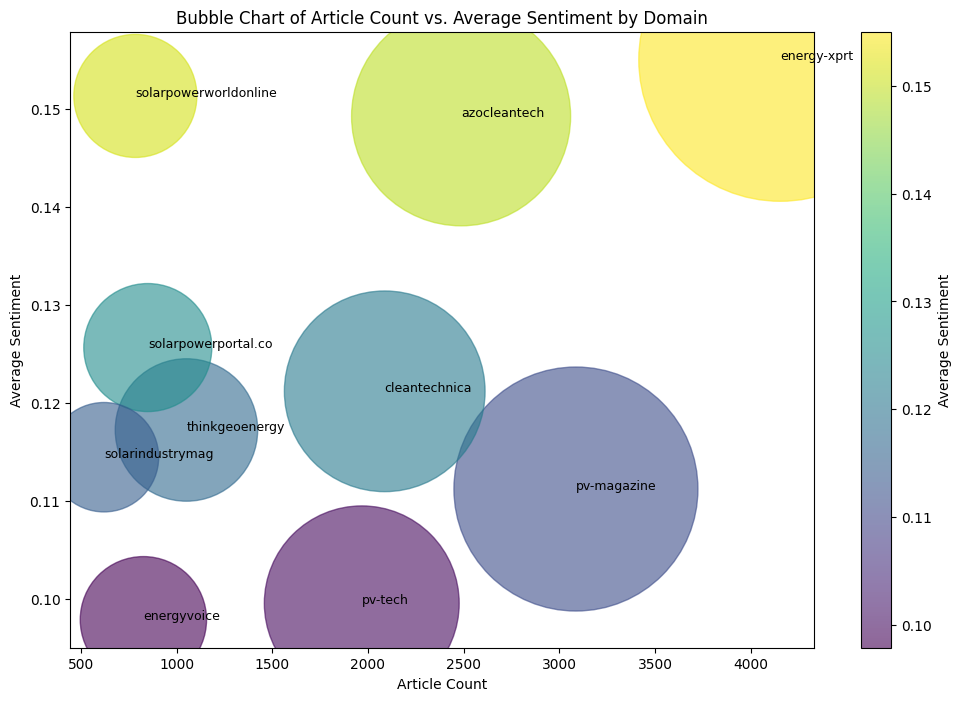

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(top_domains['article_count'], top_domains['avg_sentiment'], #top_domains defined in treemap above
            s=top_domains['article_count'] * 10, alpha=0.6, c=top_domains['avg_sentiment'], cmap='viridis')
plt.colorbar(label='Average Sentiment')
plt.title("Bubble Chart of Article Count vs. Average Sentiment by Domain")
plt.xlabel("Article Count")
plt.ylabel("Average Sentiment")

# Add domain labels
for i, domain in enumerate(top_domains.index):
    plt.text(top_domains['article_count'].iloc[i], top_domains['avg_sentiment'].iloc[i], domain, fontsize=9)

plt.show()


<ipython-input-46-5d7bbcf752d5>:32: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-46-5d7bbcf752d5>:33: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-46-5d7bbcf752d5>:34: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



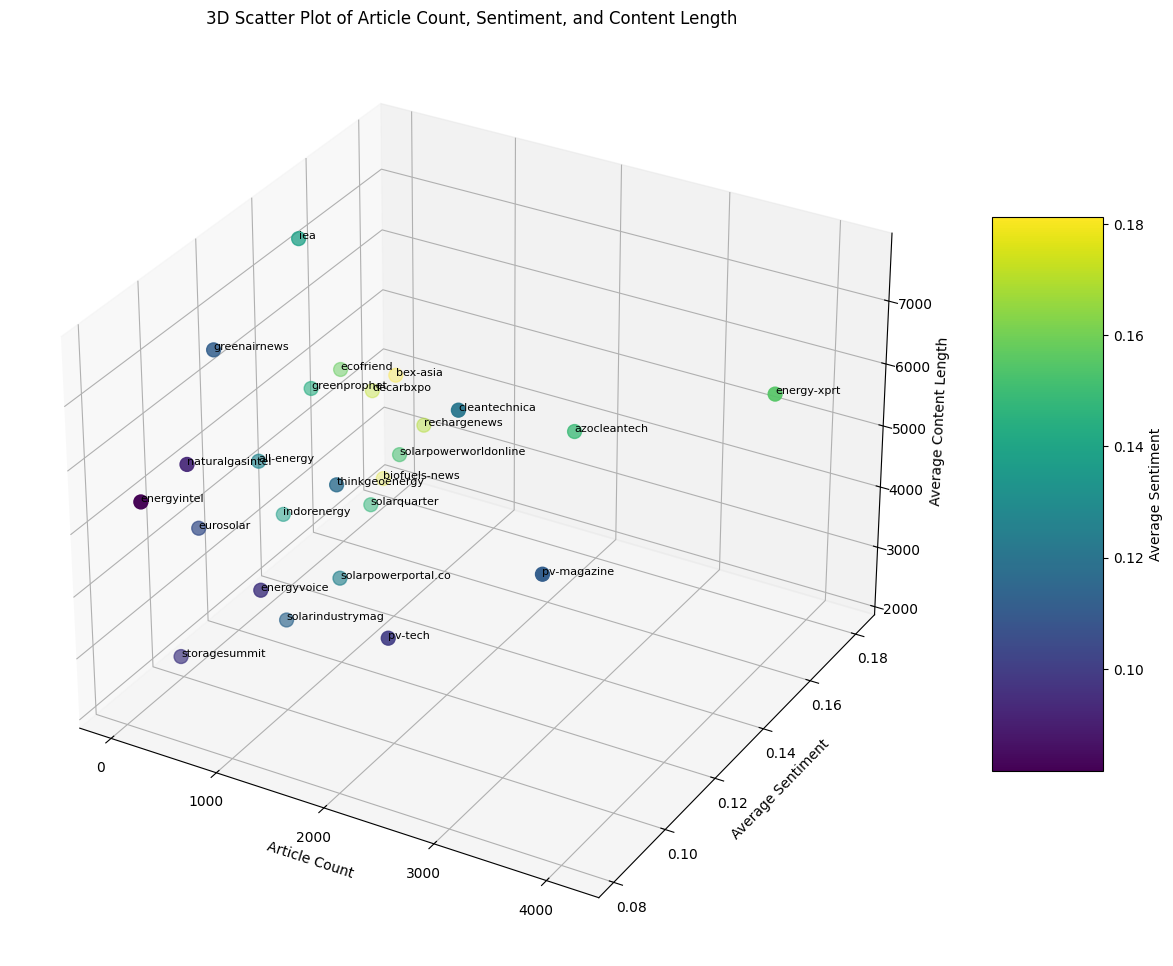

In [ ]:
# Calculate the metrics per domain
domain_stats = data_cleaned.groupby('domain').agg(
    article_count=('domain', 'size'),  # Total number of articles per domain
    avg_sentiment=('sentiment_content', 'mean'),  # Average sentiment per domain
    avg_content_length=('content_length', 'mean')  # Average content length per domain
)

# Sort by article count for clarity
domain_stats = domain_stats.sort_values(by='article_count', ascending=False)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot each domain with the three metrics, using avg_sentiment as the color scale
sc = ax.scatter(domain_stats['article_count'], domain_stats['avg_sentiment'], domain_stats['avg_content_length'],
                c=domain_stats['avg_sentiment'], cmap='viridis', s=100)

ax.set_xlabel("Article Count")
ax.set_ylabel("Average Sentiment")
ax.set_zlabel("Average Content Length")
plt.title("3D Scatter Plot of Article Count, Sentiment, and Content Length")

# Add color bar for sentiment values
cbar = plt.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label("Average Sentiment")

# Add labels for each data point (domain)
for i, domain in enumerate(domain_stats.index):
    ax.text(domain_stats['article_count'][i],
            domain_stats['avg_sentiment'][i],
            domain_stats['avg_content_length'][i],
            domain, fontsize=8)

plt.show()


In [ ]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

# Ensure that 'domain_stats' is created with the necessary metrics
# Calculate the metrics per domain
domain_stats = data_cleaned.groupby('domain').agg(
    article_count=('domain', 'size'),  # Total number of articles per domain
    avg_sentiment=('sentiment_content', 'mean'),  # Average sentiment per domain
    avg_content_length=('content_length', 'mean')  # Average content length per domain
)

# Sort by article count for clarity
domain_stats = domain_stats.sort_values(by='article_count', ascending=False)


# Base 3D scatter plot with color and size based on domain metrics
fig = px.scatter_3d(
    domain_stats,
    x='article_count',
    y='avg_sentiment',
    z='avg_content_length',
    color='avg_sentiment',
    color_continuous_scale='viridis',
    size='article_count',
    hover_name=domain_stats.index,
    title="Interactive 3D Scatter Plot of Article Count, Sentiment, and Content Length"
)

# Add labels for each domain point
for i, domain in enumerate(domain_stats.index):
    fig.add_trace(go.Scatter3d(
        x=[domain_stats['article_count'][i]],
        y=[domain_stats['avg_sentiment'][i]],
        z=[domain_stats['avg_content_length'][i]],
        mode='text',
        text=[domain],
        textposition='top center',
        showlegend=False
    ))

fig.update_layout(
    scene=dict(
        xaxis_title="Article Count",
        yaxis_title="Mean Content Sentiment",
        zaxis_title="Mean Content Length"
    ),
    coloraxis_colorbar=dict(
        thickness=10,  # Slimmer color bar
        len=0.5,       # Adjust the length of the color bar
        title="Avg Sentiment",
        title_side="right"  # Move the title to the side
    )
)

# Show the plot
fig.show()


<ipython-input-59-ba19b7e23f1e>:33: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-59-ba19b7e23f1e>:34: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-59-ba19b7e23f1e>:35: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



### Calender Heatmap
The heatmap shows article counts by month and weekday, with darker colors indicating lower counts. Article publication is consistent over the years, except for the outliers in June 2023.

<ipython-input-67-4f84f9237df2>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



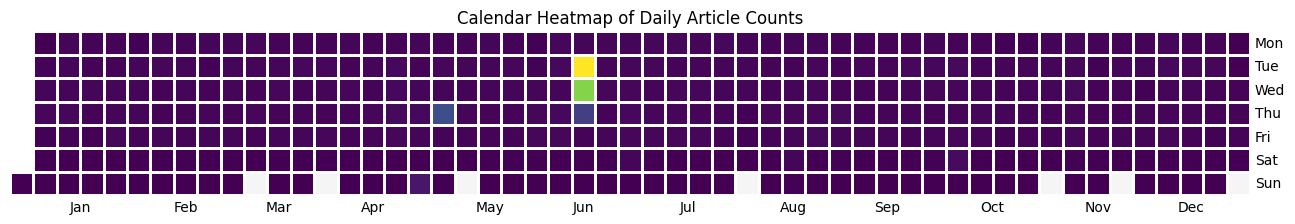

In [ ]:
#!pip install calmap
import calmap

# Set date as index
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
daily_counts = data_cleaned['date'].value_counts().sort_index()

# Plot the calendar heatmap
plt.figure(figsize=(16, 8))
calmap.yearplot(daily_counts, year=2023, cmap='viridis')
plt.title("Calendar Heatmap of Daily Article Counts")
plt.show()


### Heatmap of Common Words in Titles/Content by Sentiment

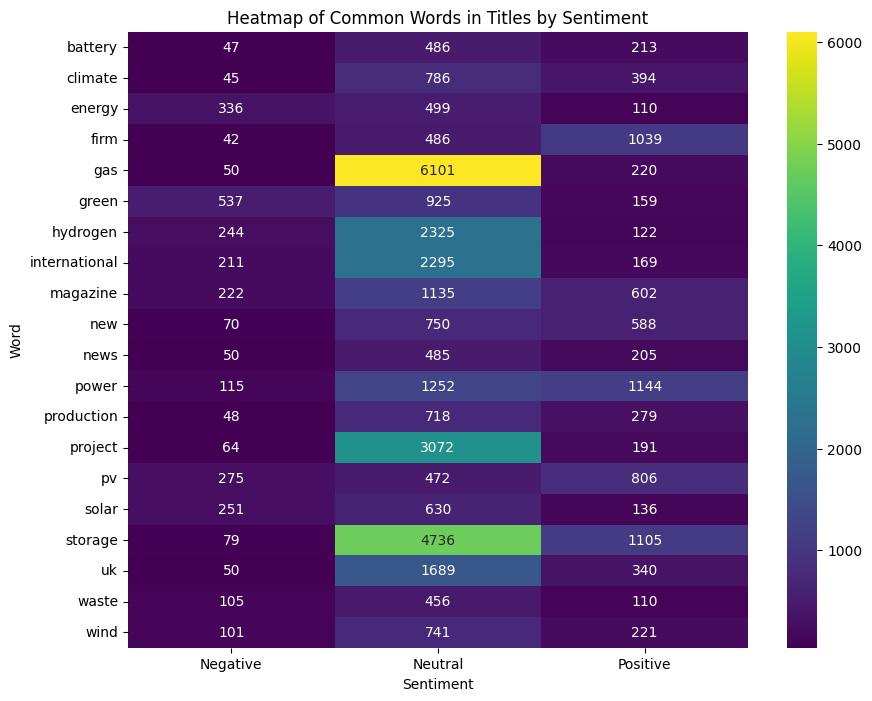

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# Filter data into positive, neutral, and negative sentiment groups
positive_titles = data_cleaned[data_cleaned['sentiment_title'] > 0]['title']
neutral_titles = data_cleaned[data_cleaned['sentiment_title'] == 0]['title']
negative_titles = data_cleaned[data_cleaned['sentiment_title'] < 0]['title']

# Get most common words for each sentiment group
vectorizer = CountVectorizer(max_features=20, stop_words='english')
pos_counts = vectorizer.fit_transform(positive_titles).toarray().sum(axis=0)
neu_counts = vectorizer.fit_transform(neutral_titles).toarray().sum(axis=0)
neg_counts = vectorizer.fit_transform(negative_titles).toarray().sum(axis=0)

# Combine into a DataFrame
words = vectorizer.get_feature_names_out()
word_counts = pd.DataFrame({'Negative': neg_counts, 'Neutral': neu_counts, 'Positive': pos_counts}, index=words)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(word_counts, annot=True, cmap="viridis", fmt="d")
plt.title("Heatmap of Common Words in Titles by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Word")
plt.show()


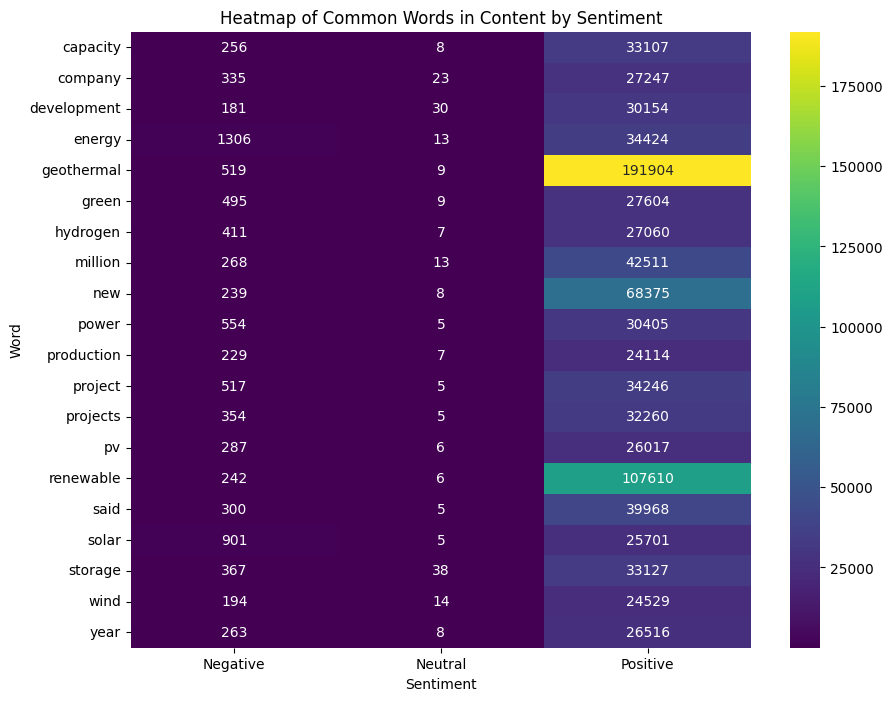

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# Filter data into positive, neutral, and negative sentiment groups
positive_titles = data_cleaned[data_cleaned['sentiment_content'] > 0]['content']
neutral_titles = data_cleaned[data_cleaned['sentiment_content'] == 0]['content']
negative_titles = data_cleaned[data_cleaned['sentiment_content'] < 0]['content']

# Get most common words for each sentiment group
vectorizer = CountVectorizer(max_features=20, stop_words='english')
pos_counts = vectorizer.fit_transform(positive_titles).toarray().sum(axis=0)
neu_counts = vectorizer.fit_transform(neutral_titles).toarray().sum(axis=0)
neg_counts = vectorizer.fit_transform(negative_titles).toarray().sum(axis=0)

# Combine into a DataFrame
words = vectorizer.get_feature_names_out()
word_counts = pd.DataFrame({'Negative': neg_counts, 'Neutral': neu_counts, 'Positive': pos_counts}, index=words)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(word_counts, annot=True, cmap="viridis", fmt="d")
plt.title("Heatmap of Common Words in Content by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Word")
plt.show()

### Radial Bar Chart of Most Common Words

The radial bar chart shows most common words in content and title, respectively.

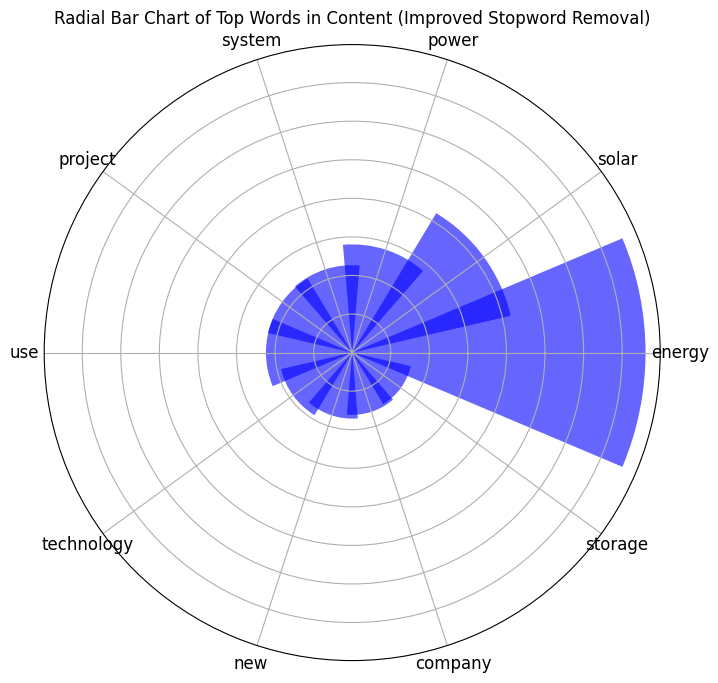

In [ ]:
# Combine all text in 'content_preprocessed' into a single string
filtered_content = data_cleaned['content_preprocessed'].str.cat(sep=' ')

# Calculate the most common words in filtered content
word_counts = Counter(filtered_content.split()).most_common(10)
words, counts = zip(*word_counts)

# Define angles for each word in the radial chart
angles = np.linspace(0, 2 * np.pi, len(words), endpoint=False)

# Set up the radial bar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot bars for each word at the specified angles
ax.bar(angles, counts, color='blue', alpha=0.6)

# Configure the chart's labels and title
ax.set_xticks(angles)
ax.set_xticklabels(words, fontsize=12)
ax.set_yticklabels([])  # Hide radial tick labels for clarity

plt.title("Radial Bar Chart of Top Words in Content (Improved Stopword Removal)")
plt.show()

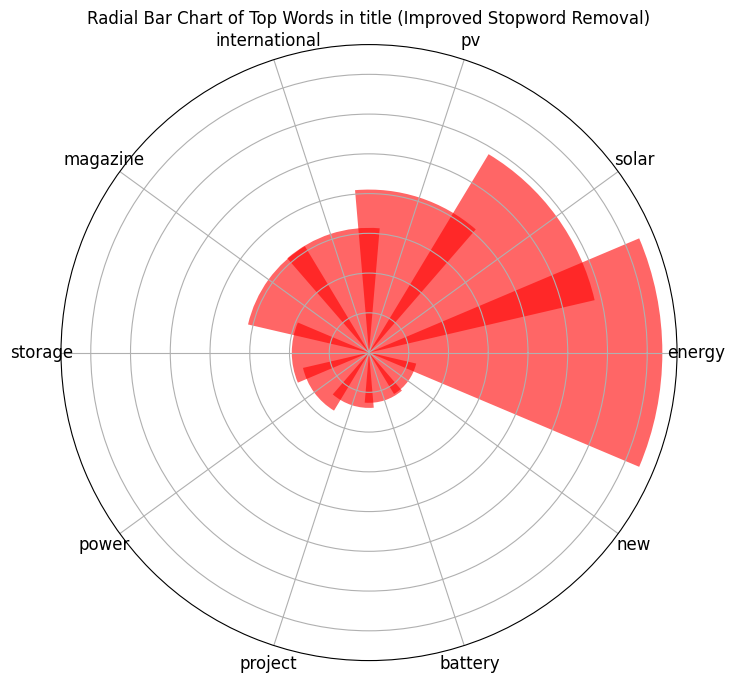

In [ ]:
filtered_content = data_cleaned['title_preprocessed'].str.cat(sep=' ')

# Calculate the most common words in filtered content
word_counts = Counter(filtered_content.split()).most_common(10)
words, counts = zip(*word_counts)

# Define angles for each word in the radial chart
angles = np.linspace(0, 2 * np.pi, len(words), endpoint=False)

# Set up the radial bar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot bars for each word at the specified angles
ax.bar(angles, counts, color='red', alpha=0.6)

# Configure the chart's labels and title
ax.set_xticks(angles)
ax.set_xticklabels(words, fontsize=12)
ax.set_yticklabels([])  # Hide radial tick labels for clarity

plt.title("Radial Bar Chart of Top Words in title (Improved Stopword Removal)")
plt.show()


### Text Metrics

In [ ]:
#import pandas as pd
#import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

# Function to calculate text metrics
def calculate_text_metrics(text):
    # Tokenize sentences and words
    sentences = sent_tokenize(text)
    words = word_tokenize(text)

    # Basic Statistics
    num_sentences = len(sentences)
    num_words = len(words)
    avg_word_length = sum(len(word) for word in words) / num_words if num_words > 0 else 0
    vocabulary_size = len(set(words))

    # Lexical Diversity: Ratio of unique words to total words
    lexical_diversity = vocabulary_size / num_words if num_words > 0 else 0

    return pd.Series({
        'word_count': num_words,
        'sentence_count': num_sentences,
        'avg_word_length': avg_word_length,
        'vocabulary_size': vocabulary_size,
        'lexical_diversity': lexical_diversity
    })

# Apply the function to each content entry
text_metrics = data_cleaned['content'].apply(calculate_text_metrics)

# Combine results with the original data
data_feature_engineered = pd.concat([data_cleaned, text_metrics], axis=1)

# Display the updated data with the new metrics
print(data_feature_engineered[['content', 'word_count', 'sentence_count', 'avg_word_length', 'vocabulary_size', 'lexical_diversity']].head(10))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             content  word_count  \
0  chinese automotive startup xpeng has shown one...       766.0   
1  sinopec has laid plans to build the largest gr...      1517.0   
2  huaneng power international has switched on a ...       730.0   
3  according to the iranian authorities, there ar...       706.0   
4  sign in to get the best natural gas news and d...       721.0   
5  sign in to get the best natural gas news and d...       681.0   
6  bp’ s “ long-term ” commitment to scotland is ...      1277.0   
7  the u.s. solar manufacturing industry, which t...      1208.0   
8  “ convergence ” is how sir jim mcdonald descri...      1307.0   
9  israeli researchers have tested organic pv mod...       998.0   

   sentence_count  avg_word_length  vocabulary_size  lexical_diversity  
0            26.0         4.045692            356.0           0.464752  
1            62.0         4.449572            563.0           0.371127  
2            36.0         4.4671

In [ ]:
data_feature_engineered.to_csv('/content/drive/MyDrive/Colab Notebooks/data_feature_engineered.csv', index=False)

# TOPIC MODELLING

# BERTopic
## Overview:

BERTopic is a state-of-the-art method for topic modeling that uses embeddings and clustering rather than probabilistic approaches.
It leverages BERT embeddings (or other transformer models) to represent documents in a dense vector space and then clusters these embeddings to find topics.
### How It Works:

First, each document is represented as a dense vector using a pre-trained transformer model (such as BERT).
These embeddings are then clustered (often using HDBSCAN) to identify groups of similar documents.
Finally, the clusters are summarized into topics by finding the most relevant words in each cluster.
### Pros:

Captures context and semantics better than traditional models, thanks to BERT.
Can handle short and noisy text, making it suitable for social media or user reviews.
### Cons:

Computationally intensive, requiring a GPU for large datasets.
May be harder to tune and interpret due to reliance on dense embeddings.
When to Use:

### Use case:
When you need high-quality, context-aware topics from a large, complex dataset and have access to the necessary computational resources.

In [ ]:
#import re
#import nltk
#from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('punkt')

# Initialize stopwords and lemmatizer
#stop_words = set(stopwords.words('english'))
#lemmatizer = WordNetLemmatizer()

#def preprocess_text(text):
#    # Convert to lowercase
#    text = text.lower()
#    # Remove punctuation and special characters
#    text = re.sub(r"[^\w\s]", "", text)
#    # Remove numbers
#    text = re.sub(r"\d+", "", text)
#    # Tokenize and remove stopwords, lemmatize, remove short words
#    words = [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text)
#             if word not in stop_words and len(word) > 2]
#    return " ".join(words)

# Apply preprocessing to the content column
#data['content_preprocessed'] = data['content'].apply(preprocess_text)
#documents = data['content_preprocessed'].tolist()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install bertopic
!pip install sentence-transformers

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Prepare your documents
documents = data_cleaned['content_preprocessed'].tolist()

# Create BERTopic model
topic_model = BERTopic()
topics, probabilities = topic_model.fit_transform(documents)

# View topics and their top words
topic_info = topic_model.get_topic_info()
print(topic_info)

# Plot topic visualization
topic_model.visualize_topics()


In [ ]:
# Generate the topics visualization and save it as a Plotly figure
fig = topic_model.visualize_topics()

# Customize colors using a Plotly color scale, e.g., 'Viridis'
fig.update_traces(marker=dict(colorscale='Viridis'))

# Display the customized visualization
fig.show()

In [ ]:
topic_info

In [ ]:
# topic_model.visualize_barchart(): Shows top words in each topic.
topic_model.visualize_barchart()

In [ ]:
# topic_model.visualize_hierarchy(): Displays a hierarchical view of the topics.
topic_model.visualize_hierarchy()

In [ ]:
# topic_model.visualize_heatmap(): Shows similarity between topics in a heatmap.
topic_model.visualize_heatmap()